In [1]:
# #Remember to select the Plotbot Environment!
# import plotbot
from plotbot import *

initialized server_access
initialized global_tracker
initialized ploptions
initialized data_cubby
initialized plot_manager
initialized mag_rtn_4sa class
initialized mag_rtn class
initialized mag_sc_4sa class
initialized mag_sc class
initialized epad class
initialized epad_hr class
initialized proton class
initialized proton_hr class
initialized proton_fits class
initialized ham_class
🔉 initialized audifier

Importing libraries, this may take a moment. Hold tight... 

✅ Imported standard libraries and utilities.
✅ Imported numpy, pandas, and scipy libraries.
✅ Imported matplotlib libraries.
✅ Imported cdflib, BeautifulSoup, requests, dateutil, and datetime libraries.

🤖 Plotbot Initialized
✨ Showdahodo initialized
Positional Data Helper Initialized
📈📉 Multiplot Initialized
   Version: 2025_05_03_v1.9
   Commit: feat: v1.9: Merge dev into main, establish new mainline, update versioning and captain's log (2025_05_03_v1.9)

🤖 Plotbot Initialized


In [2]:
#an example for how to use the pb.config to change the data server setting
config.data_server = 'berkeley' #<--default to SPDF with Berkeley as a secondary choice
# Other server options are 'spdf' or 'berkeley'

In [11]:
# ✨NEW!✨
#1. Setting positional data type (pick one to set to true)
plt.options.x_axis_r_sun = True           # Use radial distance (R_sun)
plt.options.x_axis_carrington_lon = True  # Use longitude (degrees)
plt.options.x_axis_carrington_lat = True  # Use latitude (degrees)

#2. X-axis range control:
# Fixed range (min, max) - units depend on data type (degrees or R_sun)
plt.options.x_axis_positional_range = (0, 360)  # For longitude
plt.options.x_axis_positional_range = (11, 14)  # For radial

# Auto-scaling
plt.options.x_axis_positional_range = None

#3. Common vs. separate axes:
plt.options.use_single_x_axis = True   # Common x-axis (shared across panels)
plt.options.use_single_x_axis = False  # Separate x-axis for each panel

#4. Tick density control:
plt.options.positional_tick_density = 1  # Normal tick density
plt.options.positional_tick_density = 2  # Twice as many ticks
plt.options.positional_tick_density = 3  # Three times as many ticks

# Resetting options to ensure a clean slate
plt.options.reset() 


In [4]:
# Turn off bold styling for plot title and axis labels (default is True for all three)
plt.options.bold_title = True            # Plot title bold (default: True)
plt.options.bold_x_axis_label = False    # X-axis label bold (default: False)
plt.options.bold_y_axis_label = False    # Y-axis label bold (default: False)

In [5]:
# If True, use matplotlib's constrained_layout for automatic subplot spacing.
# This disables manual control of hspace, title_pad, and margins, but usually produces clean, non-overlapping layouts.
# Set to False if you want to manually control subplot spacing and padding.
plt.options.constrained_layout = True  # or False

In [6]:
#These Options are the ✨default preset✨ for Multiplot!
#If you drop these into one of your plots, it will
#provide the perfect jumping off point to start tweaking!

#plt.options.use_single_title = True

# plt.options.height_per_panel = 1.2
# plt.options.width = 15

# plt.options.constrained_layout = True # ⭐️ (protects plot titles and x-axis tick labels from overallping)
# plt.options.bbox_inches_save_crop_mode = 'tight' #Saves the plot with white border space cut off in 'tight' mode, or 'None' to not save the plot

# plt.options.bold_y_axis_label = True
# plt.options.title_y_position = .9

# plt.options.h_space_vertical_between_plots = .25

# plt.options.y_axis_label_font_size = 16
# plt.options.x_axis_label_font_size = 16
# plt.options.title_font_size = 16

# plt.options.height_per_panel = 1.8

# plt.options.size_of_tiny_date_in_the_corner = 13

# plt.options.y_tick_label_font_size = 14
# plt.options.x_tick_label_font_size = 14

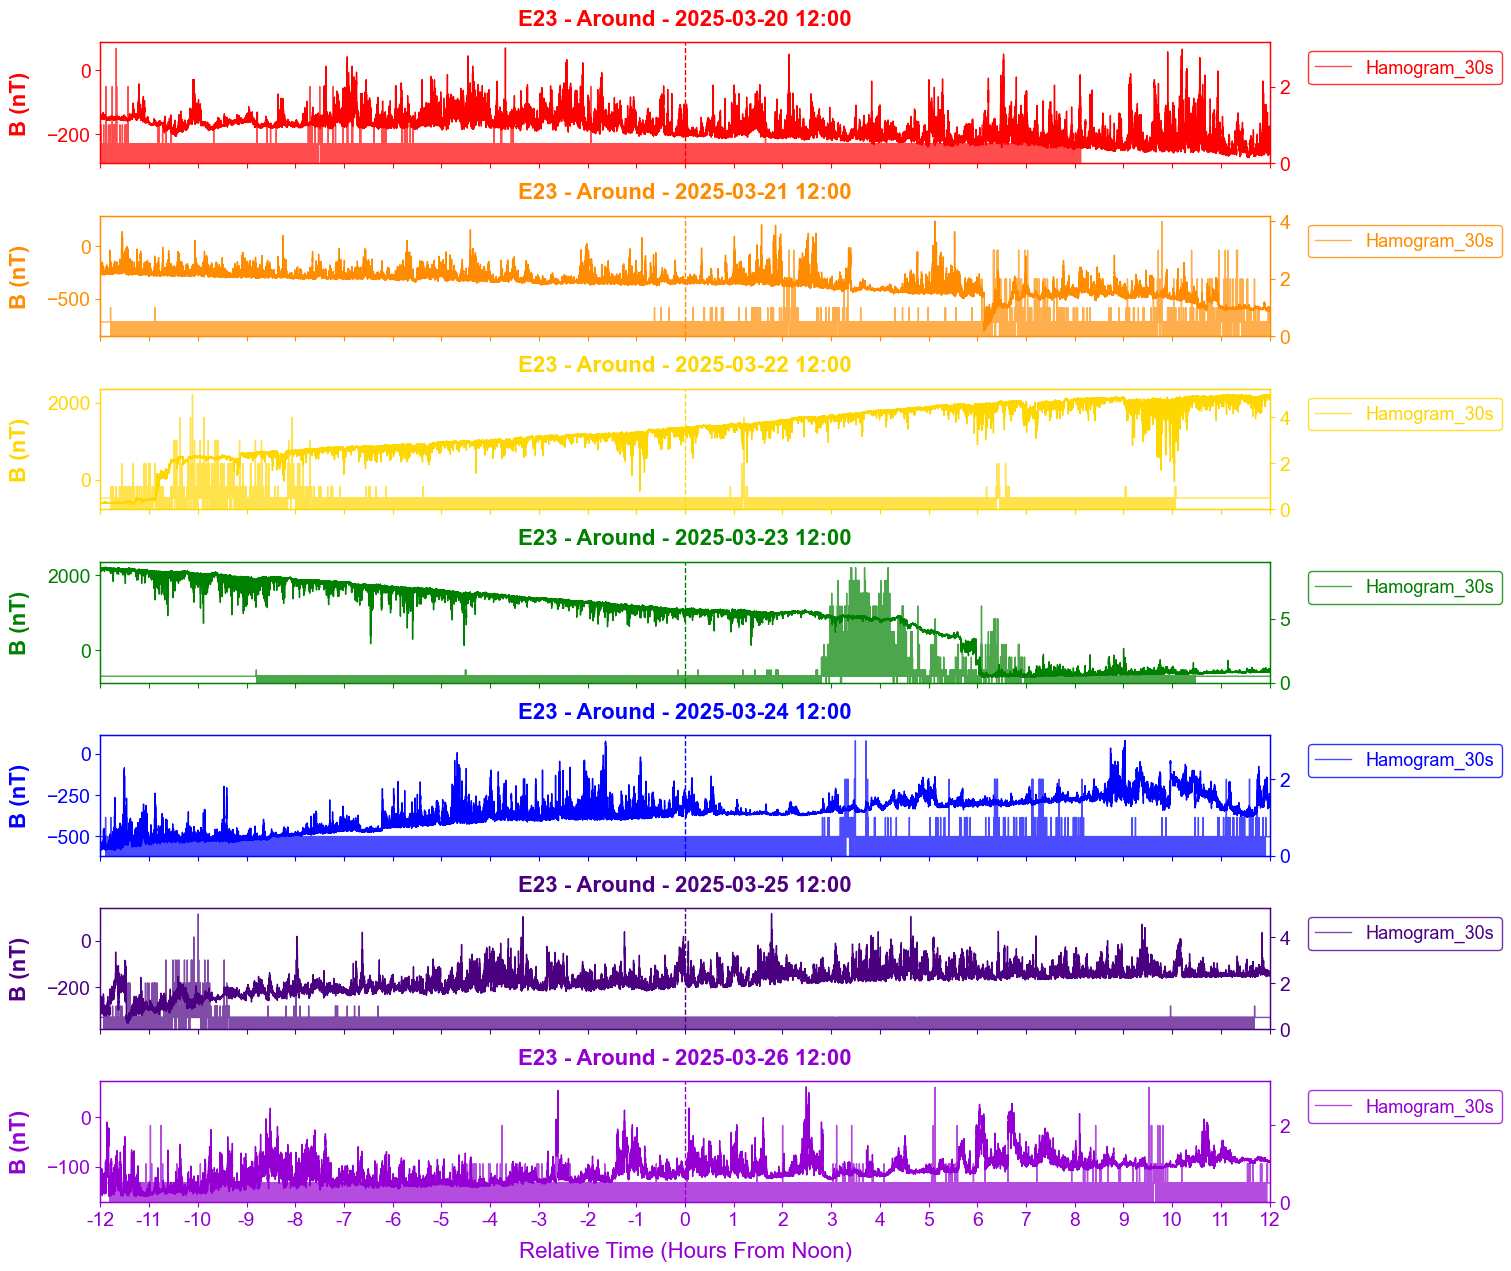

In [ ]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = False  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# CONFIGURE Titles, Labels and axes
#====================================================================
plt.options.use_single_title = False
plt.options.use_single_x_axis = True

plt.options.y_label_uses_encounter = False

plt.options.use_custom_x_axis_label = True
plt.options.custom_x_axis_label = 'Relative Time (Hours From Noon)'
plt.options.single_title_text = "PSP FIELDS Mag RTN Around noon for Multiple Days"

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
# plt.options.color_mode = 'default'  # Options: 'default', 'rainbow', 'single'

# CONFIGURE Vertical Line
#====================================================================
plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

# DATA SELECTION FOR PLOTTING
#====================================================================
plt.options.use_relative_time = True
plt.options.window = '24:00:00.000'
plt.options.position = 'around'  # Position, also try 'before' or 'after'
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 1

# Data Selection
#====================================================================
Ham_Multiplot_dates = [
    # {'noon_time': '2025-03-19/12:00:00.000'},
    {'noon_time': '2025-03-20/12:00:00.000'}, 
    {'noon_time': '2025-03-21/12:00:00.000'},
    {'noon_time': '2025-03-22/12:00:00.000'},
    {'noon_time': '2025-03-23/12:00:00.000'},
    {'noon_time': '2025-03-24/12:00:00.000'},
    {'noon_time': '2025-03-25/12:00:00.000'},
    {'noon_time': '2025-03-26/12:00:00.000'},
    # {'noon_time': '2025-03-27/12:00:00.000'}
]

plot_data = [(encounter['noon_time'], plot_variable) for encounter in Ham_Multiplot_dates]

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

# Initialize Ham! 🍖 ✨NEW!✨
#====================================================================
plt.options.hamify = True
plt.options.ham_var = ham.hamogram_30s
plt.options.ham_opacity = 0.7

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

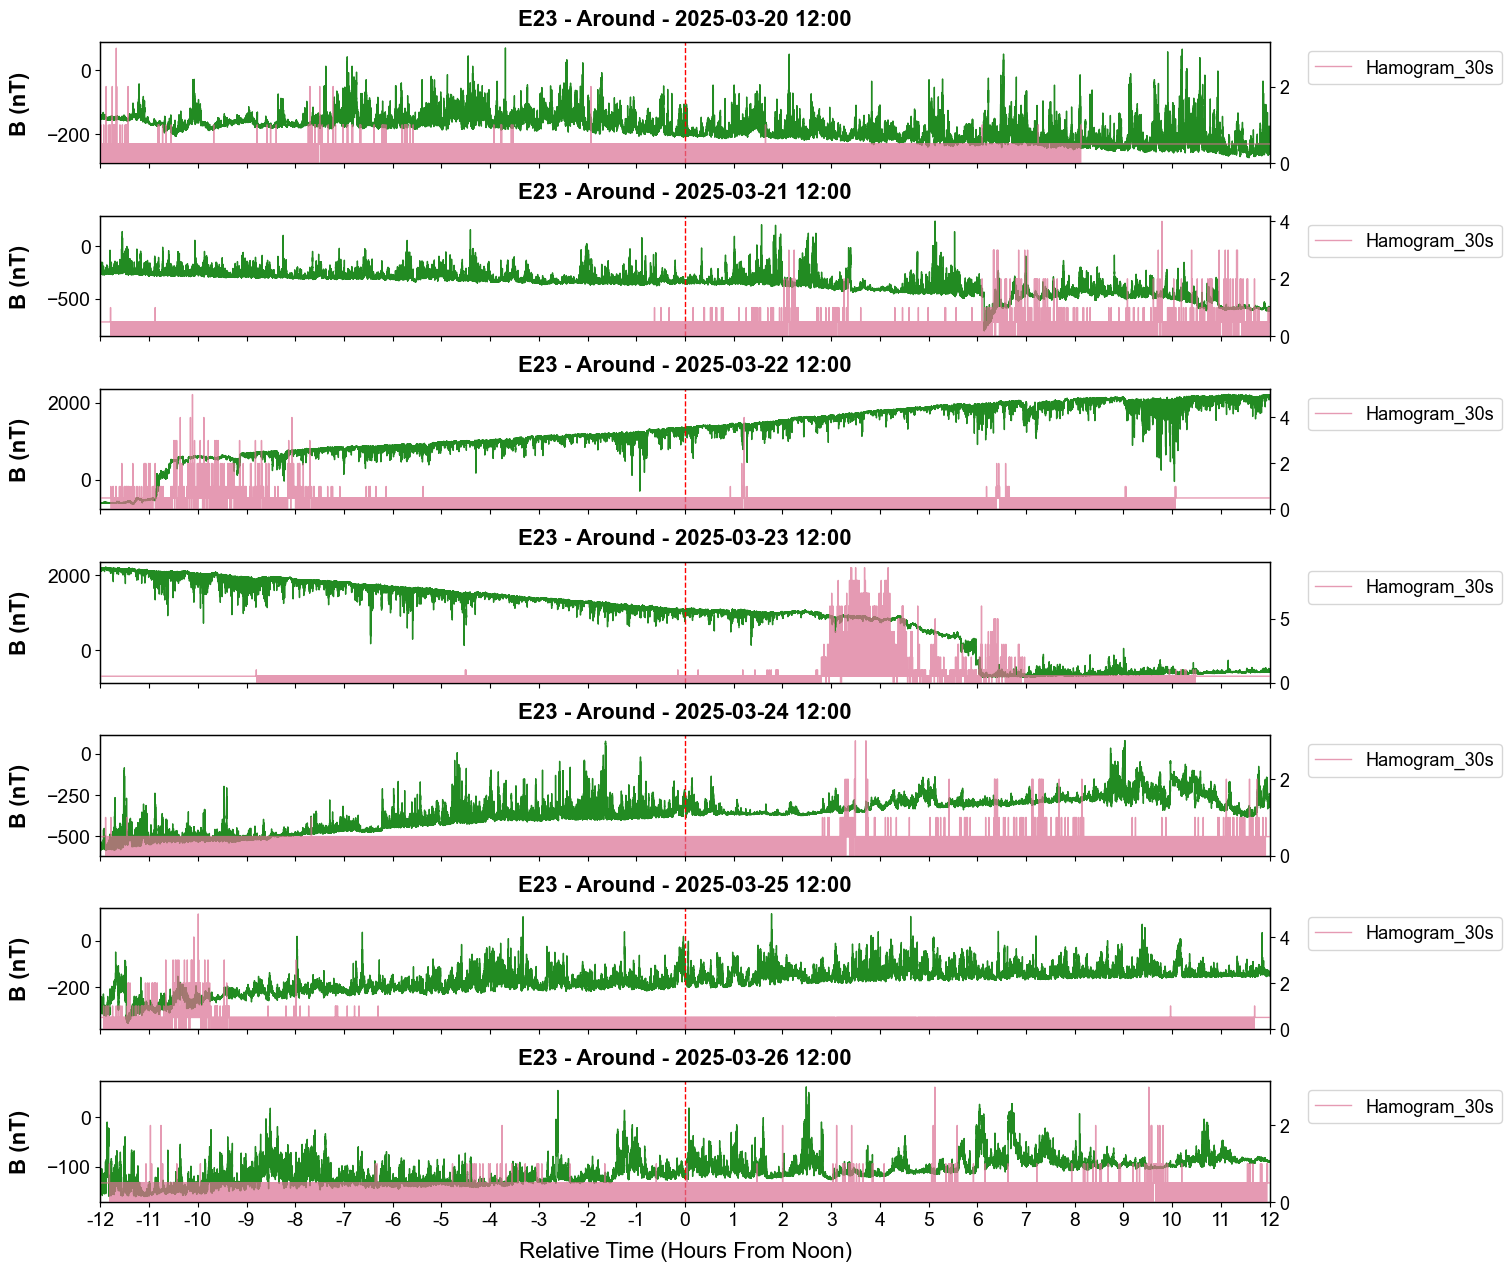

In [9]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = False  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# CONFIGURE Titles, Labels and axes
#====================================================================
plt.options.use_single_title = False
plt.options.use_single_x_axis = True

plt.options.y_label_uses_encounter = False

plt.options.use_custom_x_axis_label = True
plt.options.custom_x_axis_label = 'Relative Time (Hours From Noon)'
plt.options.single_title_text = "PSP FIELDS Mag RTN Around noon for Multiple Days"

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
# plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.color_mode = 'default'  # Options: 'default', 'rainbow', 'single'

# CONFIGURE Vertical Line
#====================================================================
plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

# DATA SELECTION FOR PLOTTING
#====================================================================
plt.options.use_relative_time = True
plt.options.window = '24:00:00.000'
plt.options.position = 'around'  # Position, also try 'before' or 'after'
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 1

# Data Selection
#====================================================================
Ham_Multiplot_dates = [
    # {'noon_time': '2025-03-19/12:00:00.000'},
    {'noon_time': '2025-03-20/12:00:00.000'}, 
    {'noon_time': '2025-03-21/12:00:00.000'},
    {'noon_time': '2025-03-22/12:00:00.000'},
    {'noon_time': '2025-03-23/12:00:00.000'},
    {'noon_time': '2025-03-24/12:00:00.000'},
    {'noon_time': '2025-03-25/12:00:00.000'},
    {'noon_time': '2025-03-26/12:00:00.000'},
    # {'noon_time': '2025-03-27/12:00:00.000'}
]

plot_data = [(encounter['noon_time'], plot_variable) for encounter in Ham_Multiplot_dates]

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

# Initialize Ham! 🍖 ✨NEW!✨
#====================================================================
plt.options.hamify = True
plt.options.ham_var = ham.hamogram_30s
plt.options.ham_opacity = 0.7

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

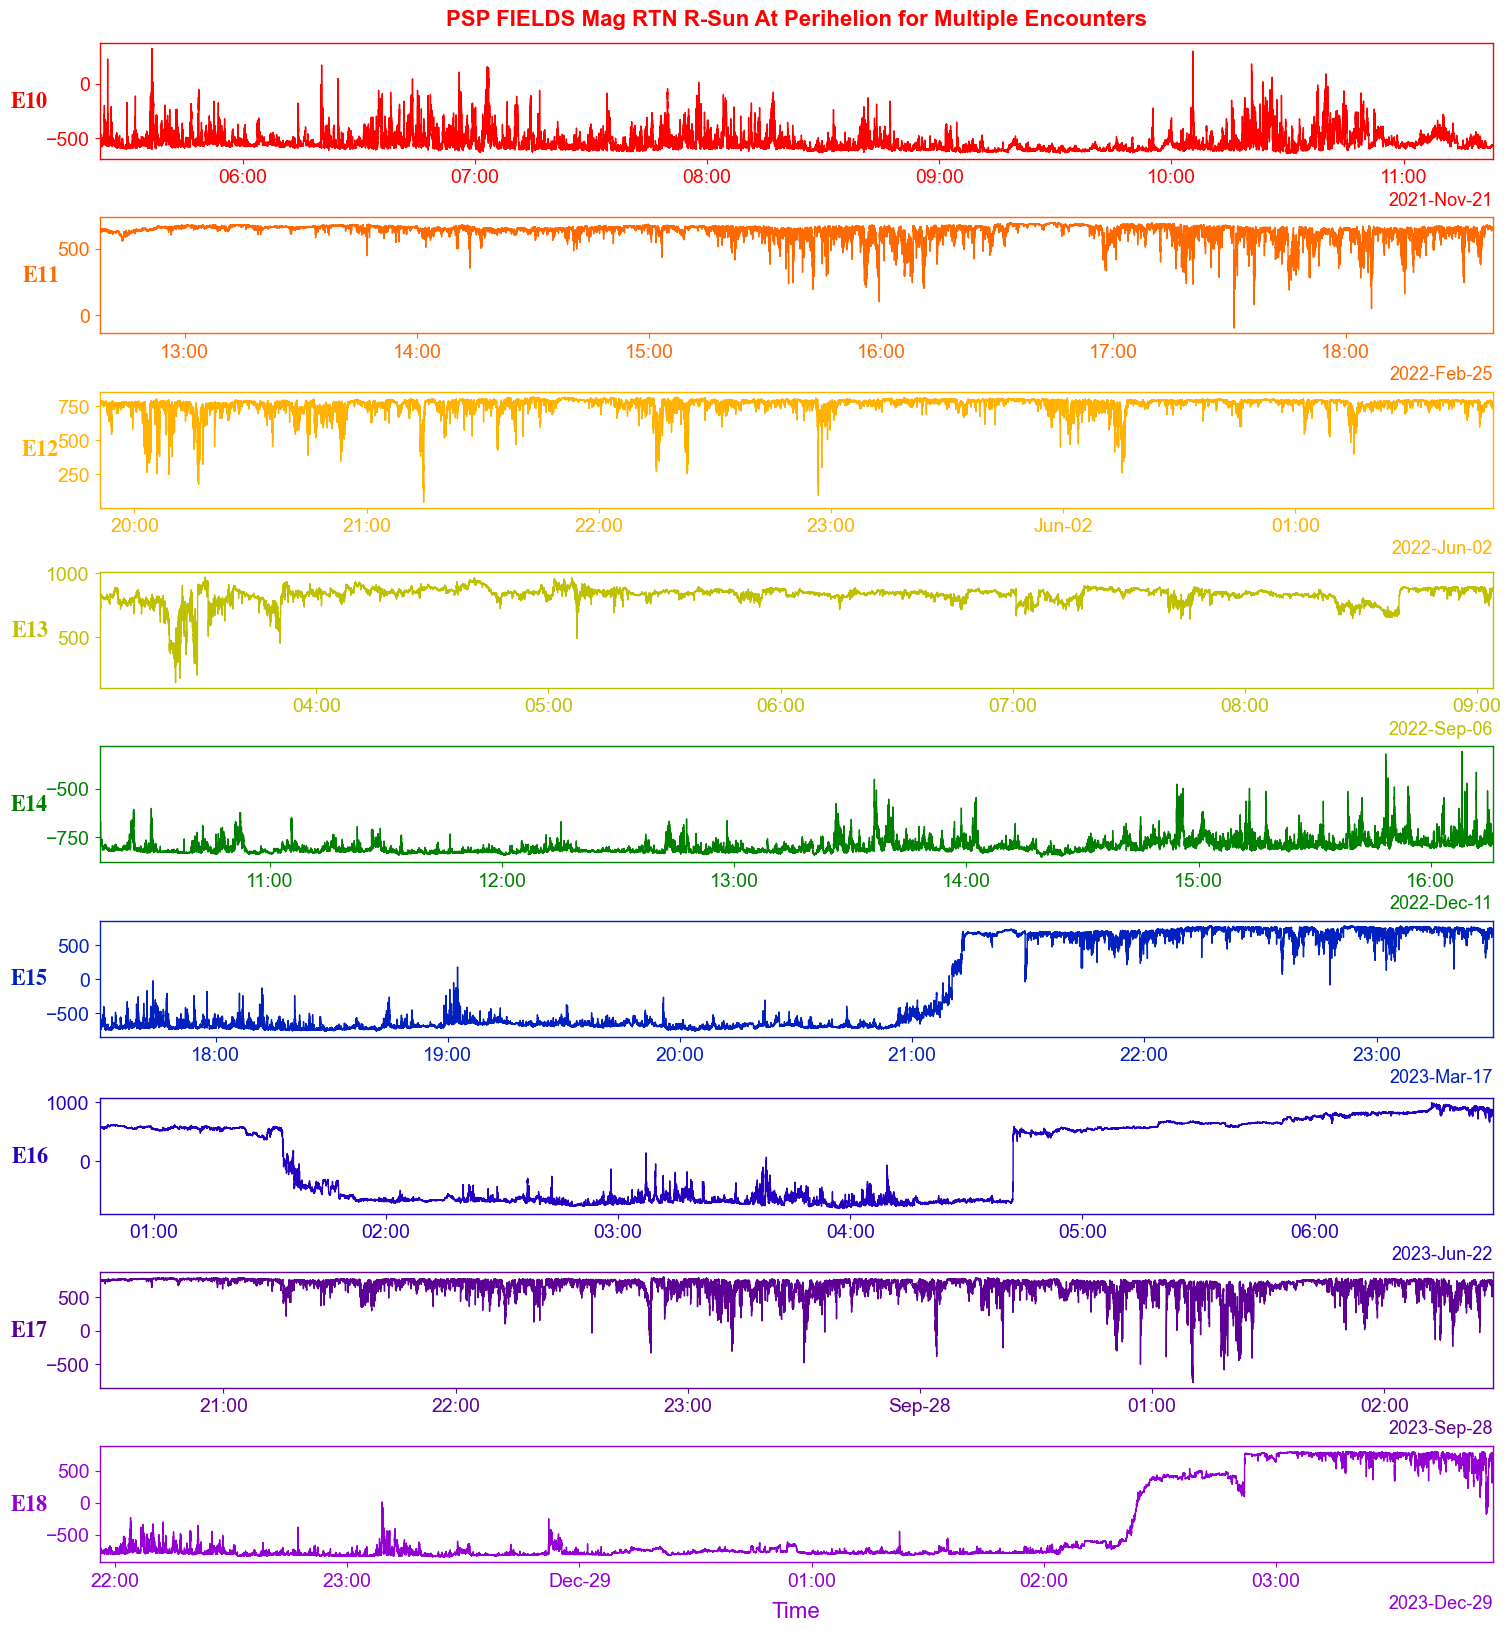

In [7]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = False  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# ✨ ACTIVATE r_sunAXIS! ✨
#====================================================================
# plt.options.x_axis_r_sun = True  # Use radial distance (R_sun)
# plt.options.x_axis_carrington_lon = False
# plt.options.x_axis_carrington_lat = False

plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

plt.options.x_axis_positional_range = None

# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================




# # Font Sizes and Padding
# plt.options.title_fontsize = 15
# plt.options.title_y_position = .965
# plt.options.title_pad = 10

# plt.options.y_label_size = 15
# plt.options.x_label_size = 15
# plt.options.x_tick_label_size = 10
# plt.options.y_tick_label_size = 10
# plt.options.y_label_pad = 5
# plt.options.x_label_pad = 7

plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

# CONFIGURE Title
#====================================================================


plt.options.single_title_text = "PSP FIELDS Mag RTN R-Sun At Perihelion for Multiple Encounters"

# CONFIGURE Vertical Line
#====================================================================

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# DATA SELECTION FOR PLOTTING
#====================================================================

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

plt.options.window = '6:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'


rainbow_encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    # {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    # {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    # {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    # {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
    # {'perihelion': '2025/03/22 22:42:00.000'}, #Enc 23 Not yet publicly available
]

# Create the plot data list using list comprehension
# plt.options.use_single_x_axis = True

plot_data = [(encounter['perihelion'], plot_variable) for encounter in rainbow_encounters]

# plt.options.use_single_title = True

# plt.options.height_per_panel = 1.2
# plt.options.width = 15

# plt.options.constrained_layout = True # ⭐️ (protects plot titles and x-axis tick labels from overallping)
# plt.options.bbox_inches_save_crop_mode = 'tight' #Saves the plot with white border space cut off in 'tight' mode, or 'None' to not save the plot

# plt.options.bold_y_axis_label = True
# plt.options.title_y_position = .9

# plt.options.h_space_vertical_between_plots = .25

# plt.options.y_axis_label_font_size = 16
# plt.options.x_axis_label_font_size = 16
# plt.options.title_font_size = 16

# plt.options.height_per_panel = 1.8

# plt.options.size_of_tiny_date_in_the_corner = 13

# plt.options.y_tick_label_font_size = 14
# plt.options.x_tick_label_font_size = 14

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

Positional X-axis requested. Initializing mapper with path: /Users/robertalexander/GitHub/Plotbot/plotbot/../support_data/trajectories/Parker_positional_data.npz
Loading Parker Solar Probe positional data from /Users/robertalexander/GitHub/Plotbot/support_data/trajectories/Parker_positional_data.npz
-> Loaded 99768 positional data points with types: radial, longitude, latitude
Positional mapping status: data_loaded=True
using_positional_axis flag set to: True
✓ Successfully initialized r_sun mapping with 99768 data points
🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20211121_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-11-21/02:23:00.000000', '2021-11-21/14:23:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_

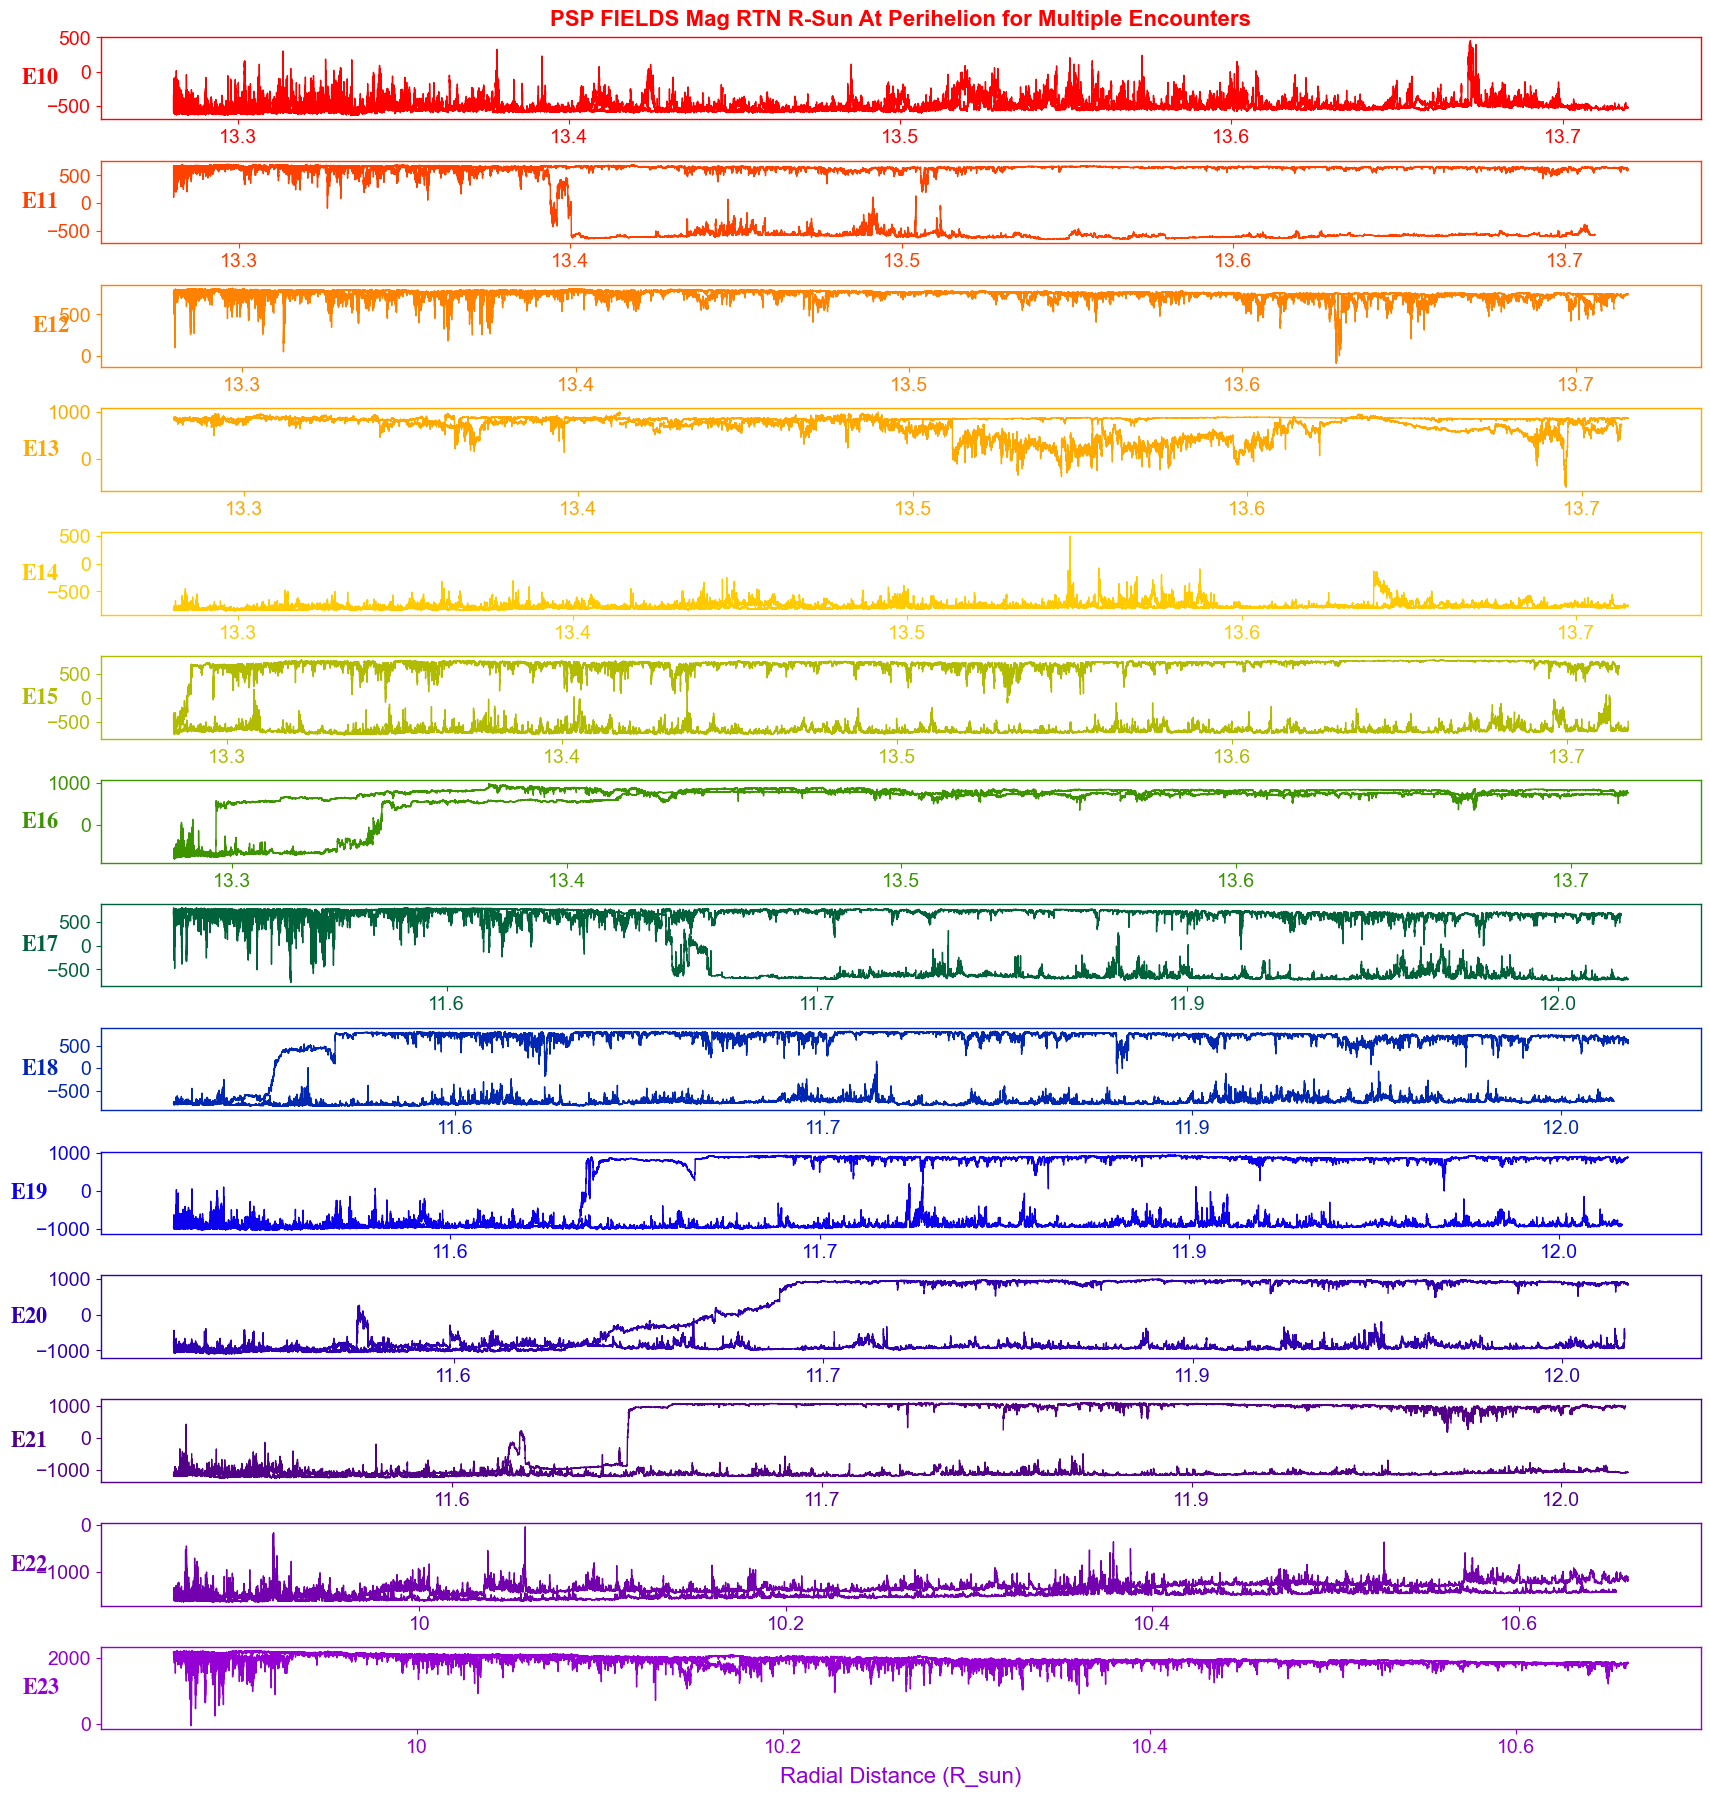

In [9]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

rainbow_encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
    {'perihelion': '2025/03/22 22:42:00.000'}, #Enc 23 Not yet publicly available
]

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# ✨ ACTIVATE r_sunAXIS! ✨
#====================================================================
plt.options.x_axis_r_sun = True  # Use radial distance (R_sun)
# plt.options.use_longitude_x_axis = False
# plt.options.x_axis_carrington_lon = False

plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

plt.options.x_axis_positional_range = None

# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================

plt.options.constrained_layout = False  # or False

# Margins

# plt.options.margin_top = 0.95 
# plt.options.margin_bottom = 0.05 
# plt.options.margin_left = 0.10  
# plt.options.margin_right = 0.9  

plt.options.save_bbox_inches = 'tight' #or try  'tight', this setting overrides the margin settings

# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1.3
plt.options.hspace = .5

# Font Sizes and Padding
plt.options.title_fontsize = 15
plt.options.title_y_position = .965
plt.options.title_pad = 10

plt.options.y_label_size = 15
plt.options.x_label_size = 15
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 7

plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

# CONFIGURE Title
#====================================================================

plt.options.use_single_title = True
plt.options.single_title_text = "PSP FIELDS Mag RTN R-Sun At Perihelion for Multiple Encounters"

# CONFIGURE Vertical Line
#====================================================================

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# DATA SELECTION FOR PLOTTING
#====================================================================

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

plt.options.window = '12:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in rainbow_encounters]

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

Positional X-axis requested. Initializing mapper with path: /Users/robertalexander/GitHub/Plotbot/plotbot/../support_data/trajectories/Parker_positional_data.npz
Loading Parker Solar Probe positional data from /Users/robertalexander/GitHub/Plotbot/support_data/trajectories/Parker_positional_data.npz
-> Loaded 99768 positional data points with types: radial, longitude, latitude
Positional mapping status: data_loaded=True
using_positional_axis flag set to: True
✓ Successfully initialized r_sun mapping with 99768 data points
🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20211120_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20211121_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-11-20/20:23:00.000000', '2021-11-21/20:23:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiri

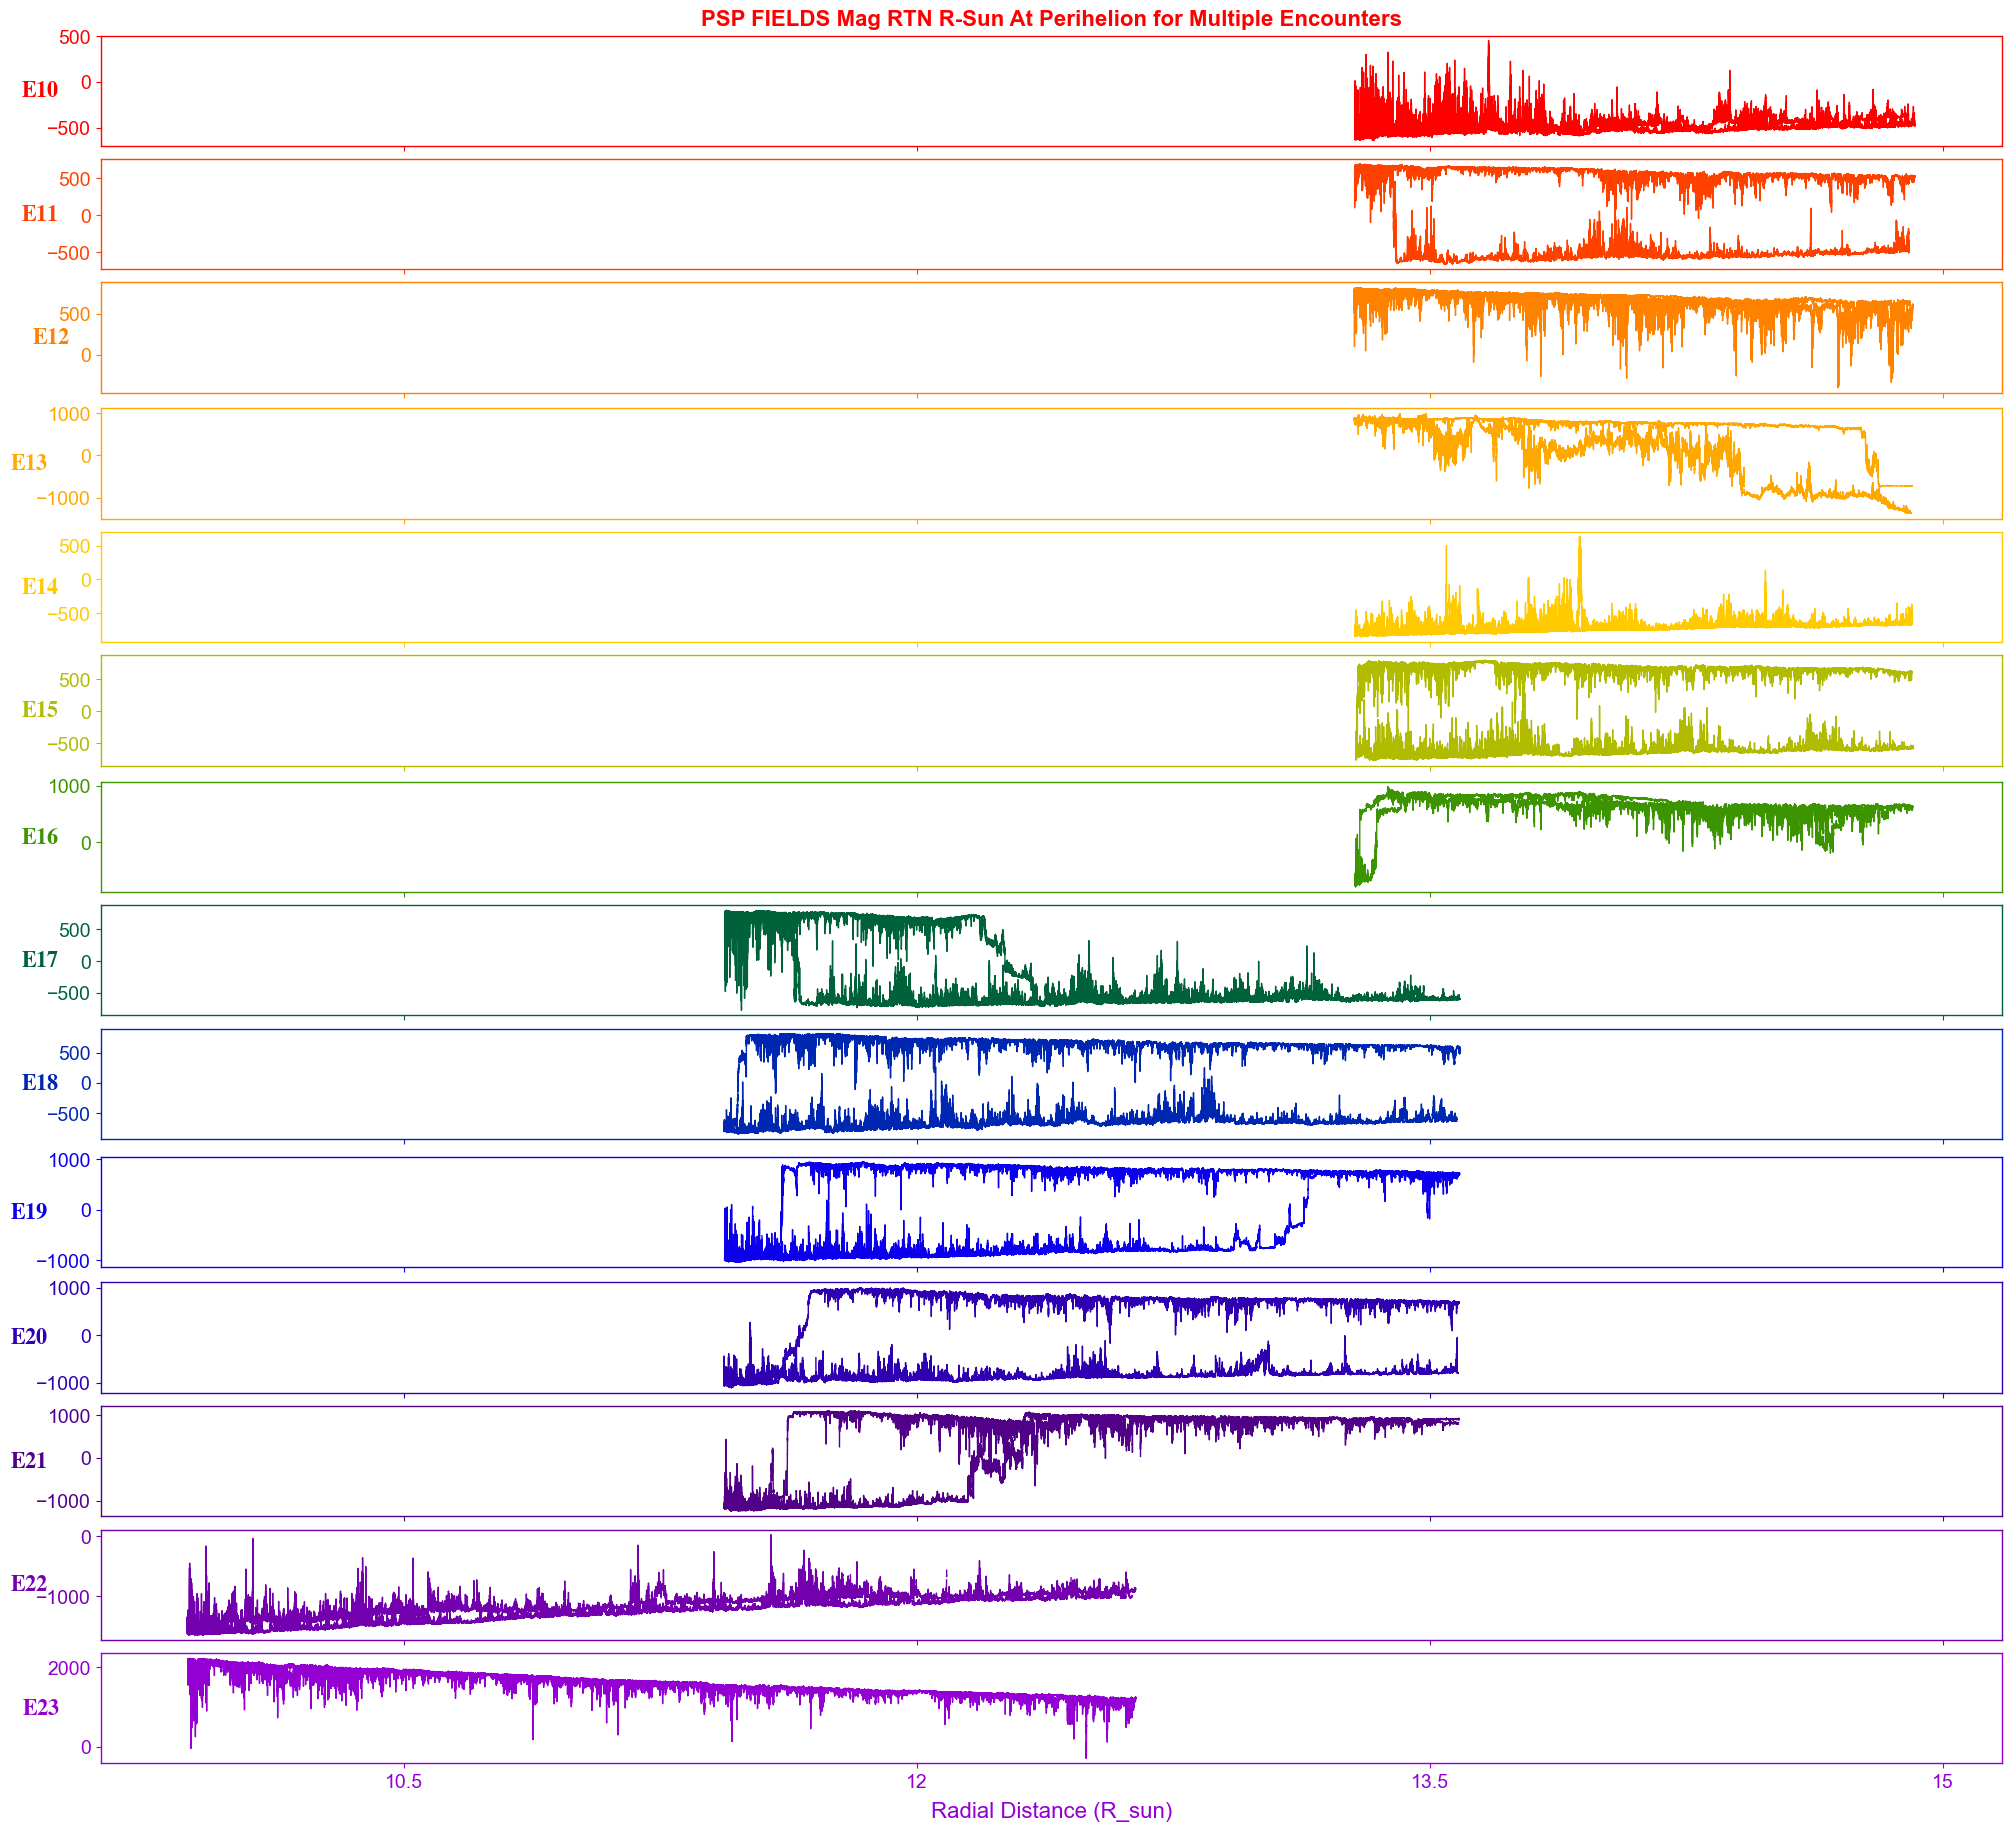

In [10]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

rainbow_encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
    {'perihelion': '2025/03/22 22:42:00.000'}, #Enc 23 Not yet publicly available
]

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# ✨ ACTIVATE r_sunAXIS! ✨
#====================================================================
plt.options.x_axis_r_sun = True  # Use radial distance (R_sun)
# plt.options.use_longitude_x_axis = False
# plt.options.x_axis_carrington_lon = False

plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

plt.options.x_axis_positional_range = None

# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================

# Margins

# plt.options.margin_top = 0.95 
# plt.options.margin_bottom = 0.05 
# plt.options.margin_left = 0.10  
# plt.options.margin_right = 0.9  

plt.options.save_bbox_inches = 'tight' #or try  'tight', this setting overrides the margin settings

# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1.3
plt.options.hspace = .35

# Font Sizes and Padding
plt.options.title_fontsize = 15
plt.options.title_y_position = .965
plt.options.title_pad = 10

plt.options.y_label_size = 15
plt.options.x_label_size = 15
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 7

plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

# CONFIGURE Title
#====================================================================

plt.options.use_single_title = True
plt.options.single_title_text = "PSP FIELDS Mag RTN R-Sun At Perihelion for Multiple Encounters"

# CONFIGURE Vertical Line
#====================================================================

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# DATA SELECTION FOR PLOTTING
#====================================================================

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

plt.options.window = '24:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in rainbow_encounters]

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

Positional X-axis requested. Initializing mapper with path: /Users/robertalexander/GitHub/Plotbot/plotbot/../support_data/trajectories/Parker_positional_data.npz
Loading Parker Solar Probe positional data from /Users/robertalexander/GitHub/Plotbot/support_data/trajectories/Parker_positional_data.npz
-> Loaded 99768 positional data points with types: radial, longitude, latitude
Positional mapping status: data_loaded=True
using_positional_axis flag set to: True
✓ Successfully initialized r_sun mapping with 99768 data points
🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20211120_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20211121_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-11-20/20:23:00.000000', '2021-11-21/20:23:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiri

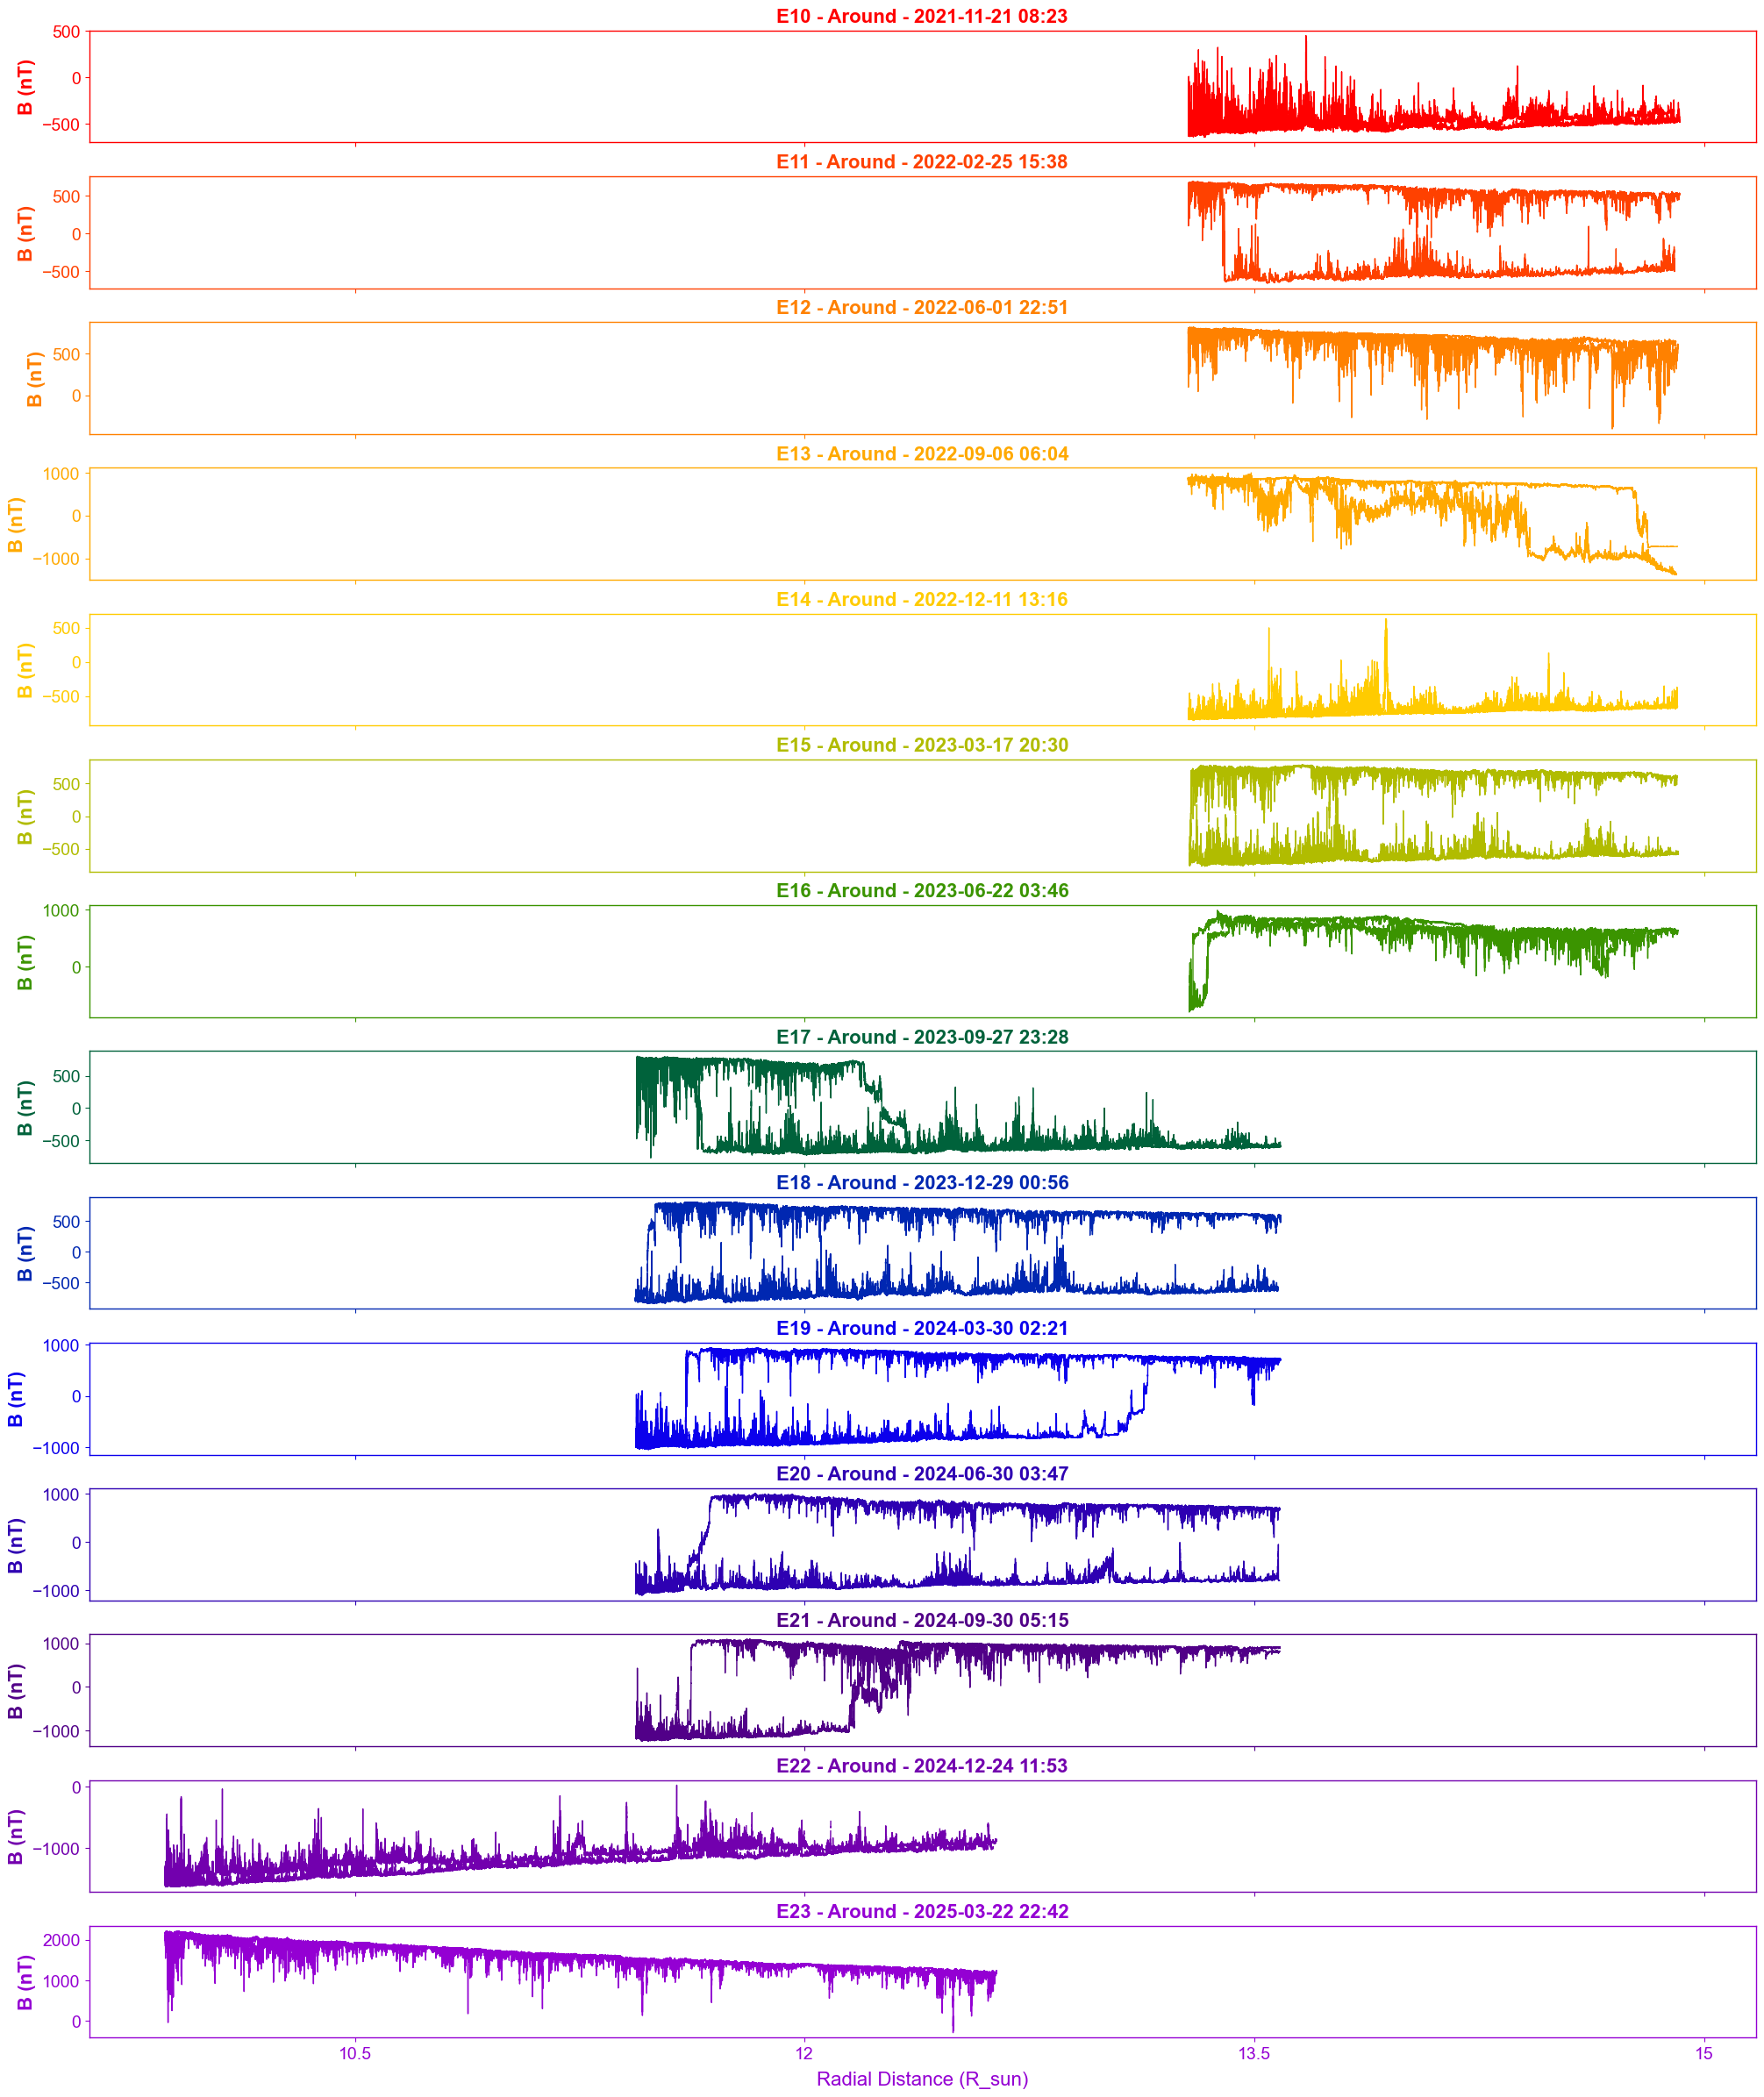

In [11]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

rainbow_encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
    {'perihelion': '2025/03/22 22:42:00.000'}, #Enc 23 Not yet publicly available
]

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# RESET PLOTTING OPTIONS (safe practice!)
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

# ✨ ACTIVATE r_sunAXIS! ✨
#====================================================================
plt.options.x_axis_r_sun = True  # Use radial distance (R_sun)
# plt.options.use_longitude_x_axis = False
# plt.options.x_axis_carrington_lon = False

plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

plt.options.x_axis_positional_range = None

# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================

# Margins

plt.options.margin_top = 0.92
plt.options.margin_bottom = 0.05 
plt.options.margin_left = 0.10  
plt.options.margin_right = 0.9  

plt.options.save_bbox_inches = None #or try  'tight', this setting overrides the margin settings

# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1.7
plt.options.hspace = .65

# Font Sizes and Padding
plt.options.title_fontsize = 15
plt.options.title_y_position = .965
plt.options.title_pad = 10

plt.options.y_label_size = 15
plt.options.x_label_size = 15
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 7

plt.options.y_label_uses_encounter = False
plt.options.y_label_includes_time = False

# CONFIGURE Title
#====================================================================

plt.options.use_single_title = False
plt.options.single_title_text = "PSP FIELDS Mag RTN R-Sun At Perihelion for Multiple Encounters"

# CONFIGURE Vertical Line
#====================================================================

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# DATA SELECTION FOR PLOTTING
#====================================================================

plot_variable = mag_rtn_4sa.br #You'll need server access to plot this variable!

plt.options.window = '24:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in rainbow_encounters]

# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

Storing global y_limit: (0, 5). Will be applied when axes are created.
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
📡 spi_sf00_l3_mom - Local .cdf files already exist:
📂 psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20230926_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230927_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230928_v04.cdf
☑️ - CDF Data import complete for spi_sf00_l3_mom range ['2023-09-26/23:28:00.000000', '2023-09-28/23:28:00.000000'].

📥 Updating spi_sf00_l3_mom...
✅ Data acquisition complete

🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
📡 spi_sf00_l3_mom - Local .cdf files already exist:
📂 psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20231228_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20231229_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20231230_v04.cdf
☑️ - CDF Data import complete

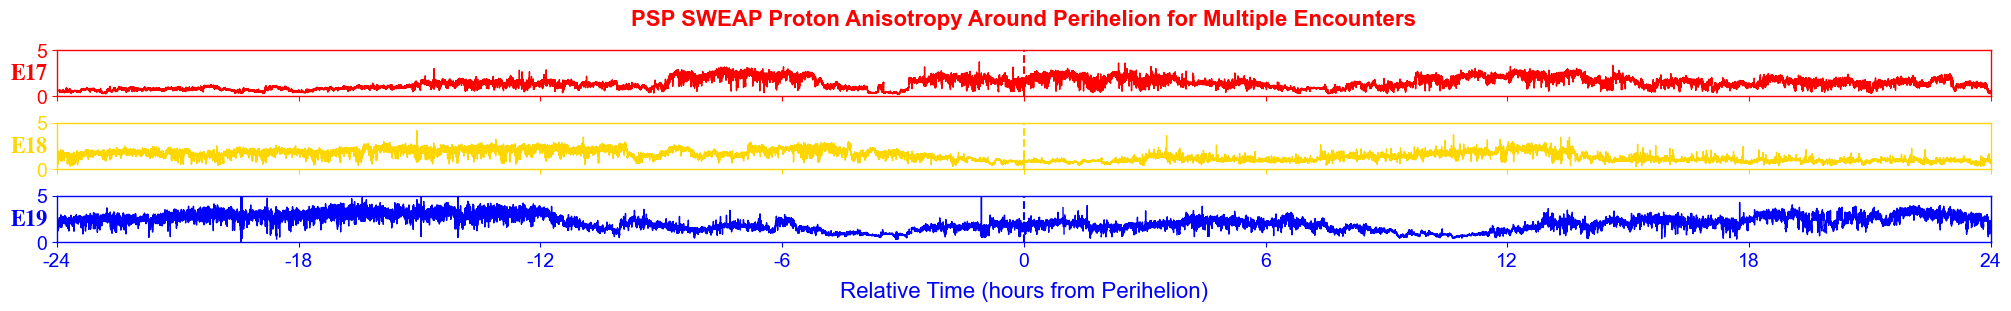

In [12]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

print_manager.show_debug = False

rainbow_encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    # {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    # {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    # {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    # {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    # {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    # {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    # {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    # {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    # {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    # {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
]


#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

#====================================================================
# RESET PLOTTING OPTIONS
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

#====================================================================
# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================
# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1
plt.options.hspace = .6

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 14
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5

plt.options.use_single_title = True
plt.options.single_title_text = "PSP SWEAP Proton Anisotropy Around Perihelion for Multiple Encounters"
plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = True
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

plt.options.set_global_y_limit((0, 5))

#====================================================================
# CONFIGURE AXIS-SPECIFIC OPTIONS ✨NEW!✨
#====================================================================
# plt.options.ax4.y_limit = (0, 5)  # Example y-limit for ax1
# Access each axis to ensure it is initialized, then set the y_limit
# for i in range(1, 20): #To properly plot the final desired axis, use the last axis number + 1 for the end range!
#     axis_attr = f'ax{i}'
#     axis_options = getattr(plt.options, axis_attr)  # This will initialize the axis if it doesn't exist
#     axis_options.y_limit = (0, 10)  # Set y-limit for axes 1 through 22
#     plt.options.y_limt
#     plt.options.ax1.y_limit
    
# plt.options.ax3.color = 'purple'

#====================================================================
# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# plt.options.color_mode = 'single'  # Options: 'default', 'rainbow', 'single'
# plt.options.single_color = 'red'     # Used when color_mode = 'single'

#====================================================================
# DATA SELECTION FOR PLOTTING
#====================================================================

plt.options.window = '48:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

plot_variable = proton.anisotropy #You'll need server access to plot this variable!

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in rainbow_encounters]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

We're downloading a LOT of data here. This will take a while, but we only need to do it once and then we'll load from the local .cdf files!
Hold tight 🙏

Panel 1: Custom variable detected: AnisotropyMinusBmag
🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
🛰️ mag_RTN_4sa - acquiring variables: bmag
📡 spi_sf00_l3_mom - Local .cdf files already exist:
📂 psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230927_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230928_v04.cdf
☑️ - CDF Data import complete for spi_sf00_l3_mom range ['2023-09-27/20:28:00.000000', '2023-09-28/02:28:00.000000'].

📥 Updating spi_sf00_l3_mom...
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230927_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230928_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2023-09-27/20:28:00.000000', '20

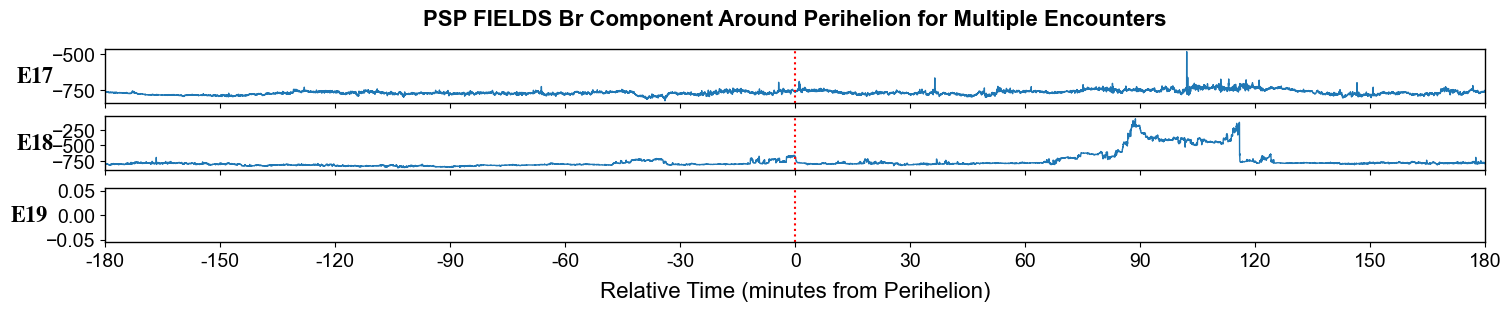

In [13]:
print_manager.show_status = True  # Status prints, ⭐️ useful for basic status updates

#Use inline for static plots and widget for interactive plots
%matplotlib inline 
# %matplotlib widget


encounters = [

    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 

]

#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

plt.options.reset() # Resetting options to ensure a clean slate

# Plot Setup
plt.options.width = 15
plt.options.height_per_panel = 1

plt.options.use_single_title = True
plt.options.single_title_text = "PSP FIELDS Br Component Around Perihelion for Multiple Encounters"
plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5

plt.options.use_relative_time = True
plt.options.relative_time_step_units = 'minutes'
plt.options.relative_time_step = 30

# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
# plt.options.color_mode = 'default'  # Options: 'default', 'rainbow', 'single'
# plt.options.single_color = None     # Used when color_mode = 'single'

# DATA SELECTION FOR PLOTTING
plt.options.window = '6:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

trange = ['2023-09-28/06:00:00.000', '2023-09-28/07:30:00.000']

plot_manager.interp_method = 'nearest'
AnisotropyMinusBmag = custom_variable('AnisotropyMinusBmag', proton.anisotropy - mag_rtn_4sa.bmag)

# plot_variable = mag_rtn_4sa.br
plot_variable = AnisotropyMinusBmag

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in encounters]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
print("We're downloading a LOT of data here. This will take a while, but we only need to do it once and then we'll load from the local .cdf files!")
print("Hold tight 🙏\n")
multiplot(plot_data);

In [14]:
#We can define a separate list of encounters to plot, or continue to use the rainbow_encounters list!
encounters = [
    # {'perihelion': '2018/11/06 03:27:00.000'}, #Enc 1
    # {'perihelion': '2019/04/04 22:39:00.000'}, #Enc 2
    # {'perihelion': '2019/09/01 17:50:00.000'}, #Enc 3
    # {'perihelion': '2020/01/29 09:37:00.000'}, #Enc 4
    # {'perihelion': '2020/06/07 08:23:00.000'}, #Enc 5
    # {'perihelion': '2020/09/27 09:16:00.000'}, #Enc 6
    # {'perihelion': '2021/01/17 17:40:00.000'}, #Enc 7
    # {'perihelion': '2021/04/29 08:48:00.000'}, #Enc 8
    # {'perihelion': '2021/08/09 19:11:00.000'}, #Enc 9
    # {'perihelion': '2021/11/21 08:23:00.000'}, #Enc 10
    # {'perihelion': '2022/02/25 15:38:00.000'}, #Enc 11
    # {'perihelion': '2022/06/01 22:51:00.000'}, #Enc 12
    # {'perihelion': '2022/09/06 06:04:00.000'}, #Enc 13
    # {'perihelion': '2022/12/11 13:16:00.000'}, #Enc 14
    # {'perihelion': '2023/03/17 20:30:00.000'}, #Enc 15
    # {'perihelion': '2023/06/22 03:46:00.000'}, #Enc 16
    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 
    # {'perihelion': '2024/06/30 03:47:00.000'}, #Enc 20 Not yet publicly available
    # {'perihelion': '2024/09/30 05:15:00.000'}, #Enc 21 Not yet publicly available
    # {'perihelion': '2024/12/24 11:53:00.000'}, #Enc 22 Not yet publicly available
]

We're downloading a LOT of data here. This will take a while, but we only need to do it once and then we'll load from the local .cdf files!
Hold tight 🙏

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20230926_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230927_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_rtn_4_sa_per_cyc_20230928_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2023-09-26/23:28:00.000000', '2023-09-28/23:28:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20231228_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2023/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20231229_v02.cdf, psp_data/fields/l2/mag_rt

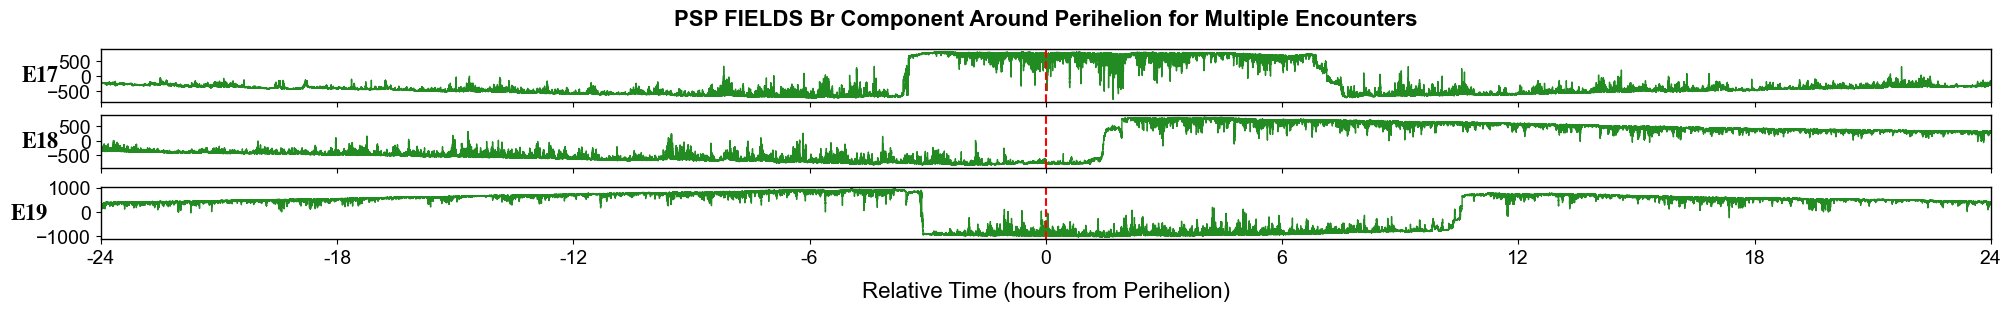

In [15]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

# print_manager.show_variable_testing = True
# print_manager.show_variable_basic = True

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

#====================================================================
# RESET PLOTTING OPTIONS
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

#====================================================================
# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================
# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1
plt.options.hspace = 0.5

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 14
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 10

plt.options.use_single_title = True
plt.options.single_title_text = "PSP FIELDS Br Component Around Perihelion for Multiple Encounters"
plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = True
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

#====================================================================
# CONFIGURE AXIS-SPECIFIC OPTIONS ✨NEW!✨
#====================================================================
# plt.options.ax1.y_limit = (-3000, 3000)  # Example y-limit for ax1
# plt.options.ax3.color = 'purple'

#====================================================================
# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
plt.options.color_mode = 'default'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# plt.options.color_mode = 'single'  # Options: 'default', 'rainbow', 'single'
# plt.options.single_color = 'red'     # Used when color_mode = 'single'

#====================================================================
# DATA SELECTION FOR PLOTTING
#====================================================================

plt.options.window = '48:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

plot_variable = mag_rtn_4sa.br


# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in encounters]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
print("We're downloading a LOT of data here. This will take a while, but we only need to do it once and then we'll load from the local .cdf files!")
print("Hold tight 🙏\n")
multiplot(plot_data);

In [16]:
# # Create an empty list to store plot data
# plot_data = []

# # Process each encounter
# for i, encounter in enumerate(encounters):
#     # Get data for this time range
#     trange = [encounter['rangeStart'], encounter['rangeStop']]
#     get_data(trange, mag_rtn_4sa.bmag, proton.anisotropy)
    
#     # Create derived variable
#     TAoverBmag = proton.anisotropy / mag_rtn_4sa.bmag 
    
#     # Store with unique name
#     enc_num = i + 1  # Encounter number (1-based)
#     unique_name = f"TAoverBmag_E{enc_num}"
#     store_data(unique_name, data={'x': TAoverBmag.datetime_array, 'y': TAoverBmag})
    
#     # Add to plot data using the uniquely stored variable
#     # We reference the variable by its new name
#     derived_var = eval(unique_name)  # This works because it was made globally accessible
#     plot_data.append((encounter['perihelion'], derived_var))



# # Plot everything
# multiplot(plot_data);

✨Changing Font Sizes! And yes... this is a bit over the top 😱✨

🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
📡 spi_sf00_l3_mom - Local .cdf files already exist:
📂 psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20230925_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20230926_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230927_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230928_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_l3_mom_20230929_v04.cdf
☑️ - CDF Data import complete for spi_sf00_l3_mom range ['2023-09-25/23:28:00.000000', '2023-09-29/23:28:00.000000'].

📥 Updating spi_sf00_l3_mom...
✅ Data acquisition complete

🛰️ spi_sf00_l3_mom - acquiring variables: anisotropy
📡 spi_sf00_l3_mom - Local .cdf files already exist:
📂 psp_data/sweap/spi/l3/spi_sf00_l3_mom/2023/psp_swp_spi_sf00_L3_mom_20231227_v04.cdf, psp_data/sweap/spi/l3/spi_sf00_l3_m

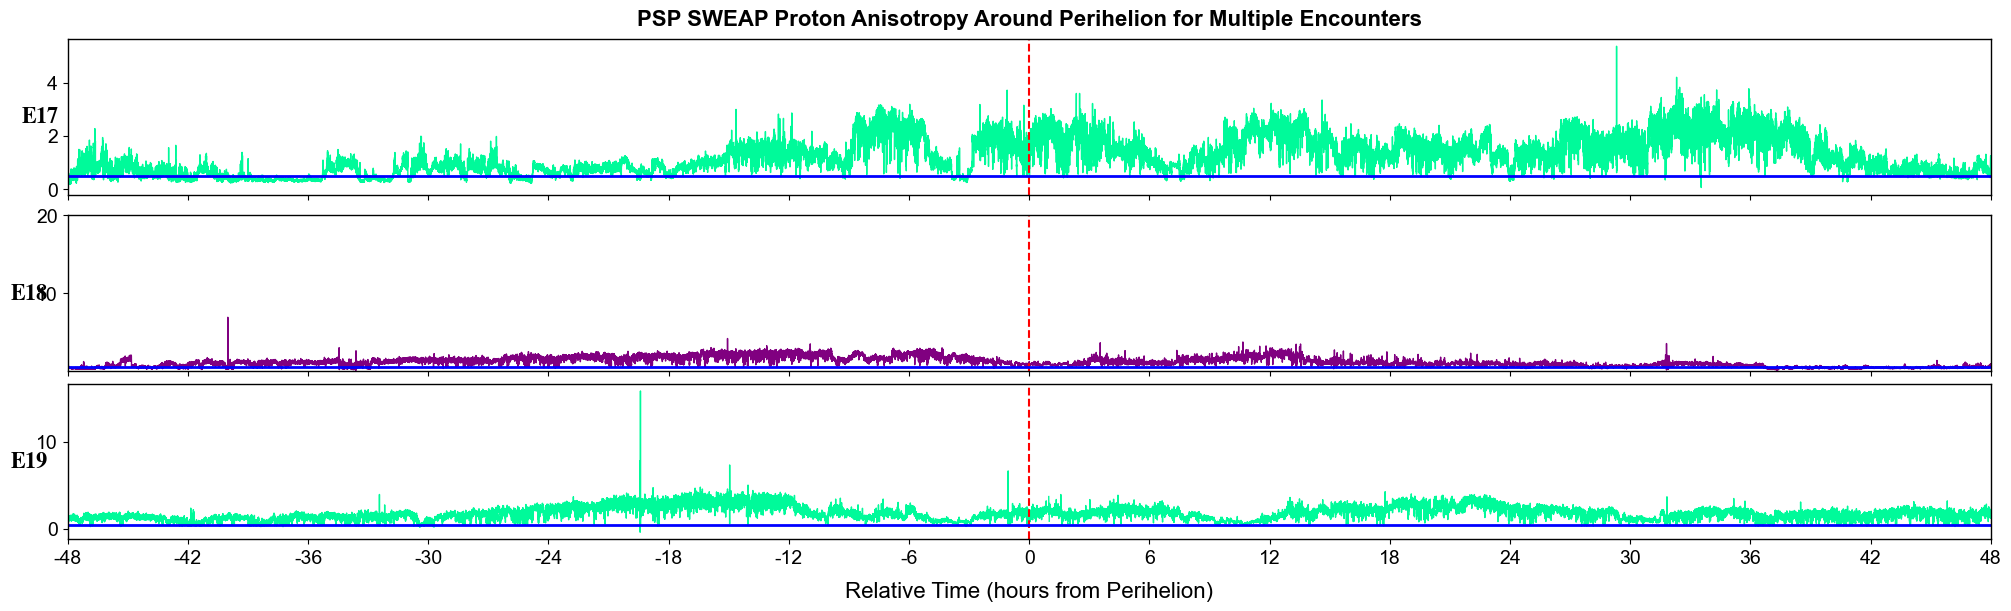

In [17]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

print('✨Changing Font Sizes! And yes... this is a bit over the top 😱✨\n')

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False # Debug prints, helpful for debugging

server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

#====================================================================
# RESET PLOTTING OPTIONS
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

#====================================================================
# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================
# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 2
plt.options.hspace = .5

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 14
plt.options.x_label_size = 12

# plt.options.x_tick_label_size = 10
# plt.options.y_tick_label_size = 10

plt.options.x_tick_label_size = 30
plt.options.y_tick_label_size = 30

plt.options.y_label_pad = 5
plt.options.x_label_pad = 10

plt.options.use_single_title = True
plt.options.single_title_text = "PSP SWEAP Proton Anisotropy Around Perihelion for Multiple Encounters"
plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = True
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

#====================================================================
# CONFIGURE AXIS-SPECIFIC OPTIONS ✨NEW!✨
#====================================================================
plt.options.ax2.y_limit = (0.01, 20)  # Example y-limit for ax2
# Access each axis to ensure it is initialized, then set the y_limit
# for i in range(1, 4): #To properly plot the final desired axis, use the last axis number + 1 for the end range!
#     axis_attr = f'ax{i}'
#     axis_options = getattr(plt.options, axis_attr)  # This will initialize the axis if it doesn't exist
#     axis_options.y_limit = (0, 10)  # Set y-limit for axes 1 through 22

plt.options.ax2.color = 'purple'

#====================================================================
# Rainbow Plot 🌈 -- Uncomment the second set for a single color plot!
#====================================================================
# plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

# plt.options.color_mode = 'single'  # Options: 'default', 'rainbow', 'single'
# plt.options.single_color = 'red'     # Used when color_mode = 'single'


#====================================================================
# Draw a horizontal line at a specific value!
#====================================================================
plt.options.draw_horizontal_line = True
plt.options.horizontal_line_value = 0.5
plt.options.horizontal_line_color = 'blue'
plt.options.horizontal_line_width = 2
plt.options.horizontal_line_style = '-'
plt.options.border_line_width = 1

# # Axis-specific horizontal line
# plt.options.ax1.draw_horizontal_line = True
# plt.options.ax1.horizontal_line_value = 2.0
# plt.options.ax1.horizontal_line_color = 'green'

#====================================================================
# DATA SELECTION FOR PLOTTING
#====================================================================

plt.options.window = '96:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

plot_variable = proton.anisotropy #You'll need server access to plot this variable!

# Create the plot data list using list comprehension
plot_data = [(encounter['perihelion'], plot_variable) for encounter in encounters]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
# multiplot(plot_data); #You'll need server access to plot this variable! ✨Un-comment to Plot! 

# Add this after calling multiplot
fig, axs = multiplot(plot_data)
    


🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210428_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-04-28/22:00:00.000000', '2021-04-29/04:00:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-04-29/05:20:00.000000', '2021-04-29/11:20:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF D

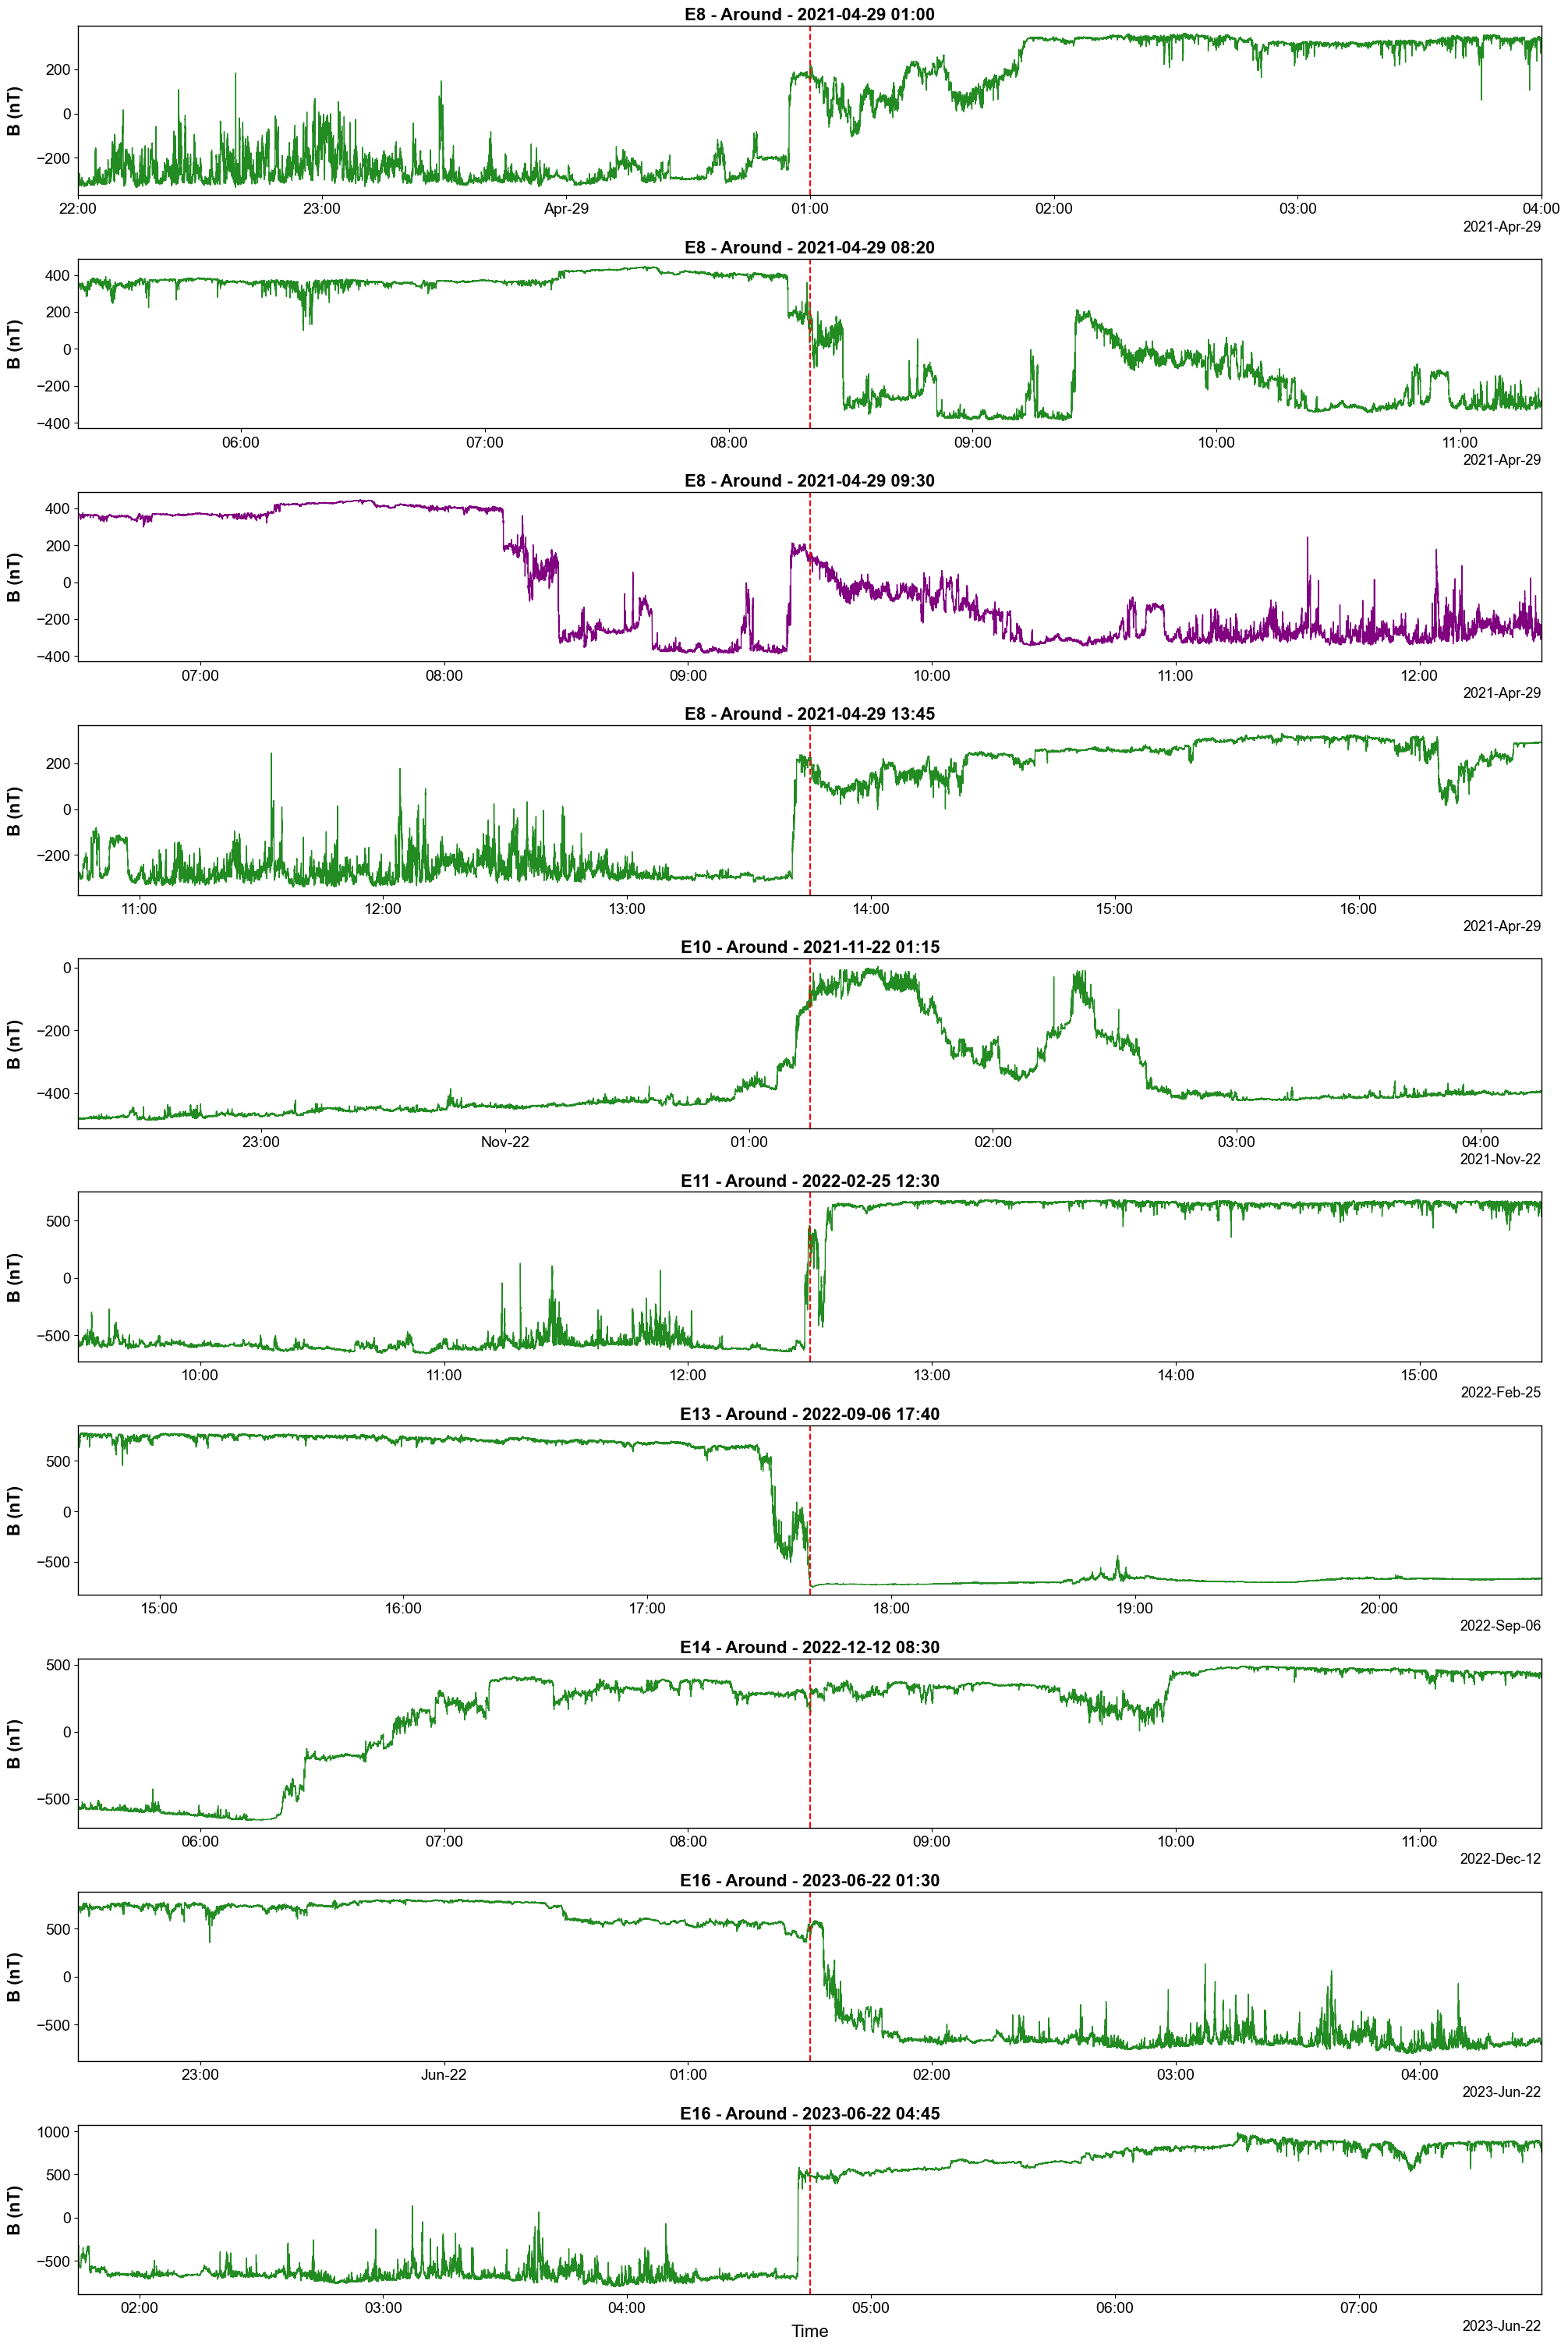

In [18]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC 📉📉📉📉📉📉-----#######

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

# server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

#====================================================================
# RESET PLOTTING OPTIONS
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

#====================================================================
# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================
# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 3
plt.options.hspace = .5

plt.options.use_single_title = False
plt.options.single_title_text = "Br Around PSP HCS Crossings"
plt.options.y_label_uses_encounter = False
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = False
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

#====================================================================
# CONFIGURE AXIS-SPECIFIC OPTIONS ✨NEW!✨
#====================================================================
# plt.options.ax1.y_limit = (-3000, 3000)  # Example y-limit for ax1
plt.options.ax3.color = 'purple'

#====================================================================
# DATA SELECTION FOR PLOTTING
#====================================================================
hcs_crossing_times = [ #in the previous example we defined the times outside the cell, either way works!
    '2021-04-29/01:00:00.000',
    '2021-04-29/08:20:00.000',
    '2021-04-29/09:30:00.000',
    '2021-04-29/13:45:00.000',
    '2021-11-22/01:15:00.000',
    '2022-02-25/12:30:00.000',
    '2022-09-06/17:40:00.000',
    '2022-12-12/08:30:00.000',
    '2023-06-22/01:30:00.000',
    '2023-06-22/04:45:00.000'
]

plt.options.window = '06:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

plot_variable = mag_rtn_4sa.br

# Create the plot data list using list comprehension
plot_data = [(time, plot_variable) for time in hcs_crossing_times]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #✨Un-comment to Plot! 

🛰️ spe_sf0_pad - acquiring variables: strahl
📡 spe_sf0_pad - Local .cdf files already exist:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2021/psp_swp_spe_sf0_l3_pad_20210428_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2021/psp_swp_spe_sf0_l3_pad_20210429_v04.cdf
☑️ - CDF Data import complete for spe_sf0_pad range ['2021-04-28/22:00:00.000000', '2021-04-29/04:00:00.000000'].

📥 Updating spe_sf0_pad...
✅ Data acquisition complete

🛰️ spe_sf0_pad - acquiring variables: strahl
📡 spe_sf0_pad - A local .cdf file already exists:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2021/psp_swp_spe_sf0_l3_pad_20210429_v04.cdf
☑️ - CDF Data import complete for spe_sf0_pad range ['2021-04-29/05:20:00.000000', '2021-04-29/11:20:00.000000'].

📥 Updating spe_sf0_pad...
✅ Data acquisition complete

🛰️ spe_sf0_pad - acquiring variables: strahl
📡 spe_sf0_pad - A local .cdf file already exists:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2021/psp_swp_spe_sf0_l3_pad_20210429_v04.cdf
☑️ - CDF Data import complete for spe_sf0_pad range ['

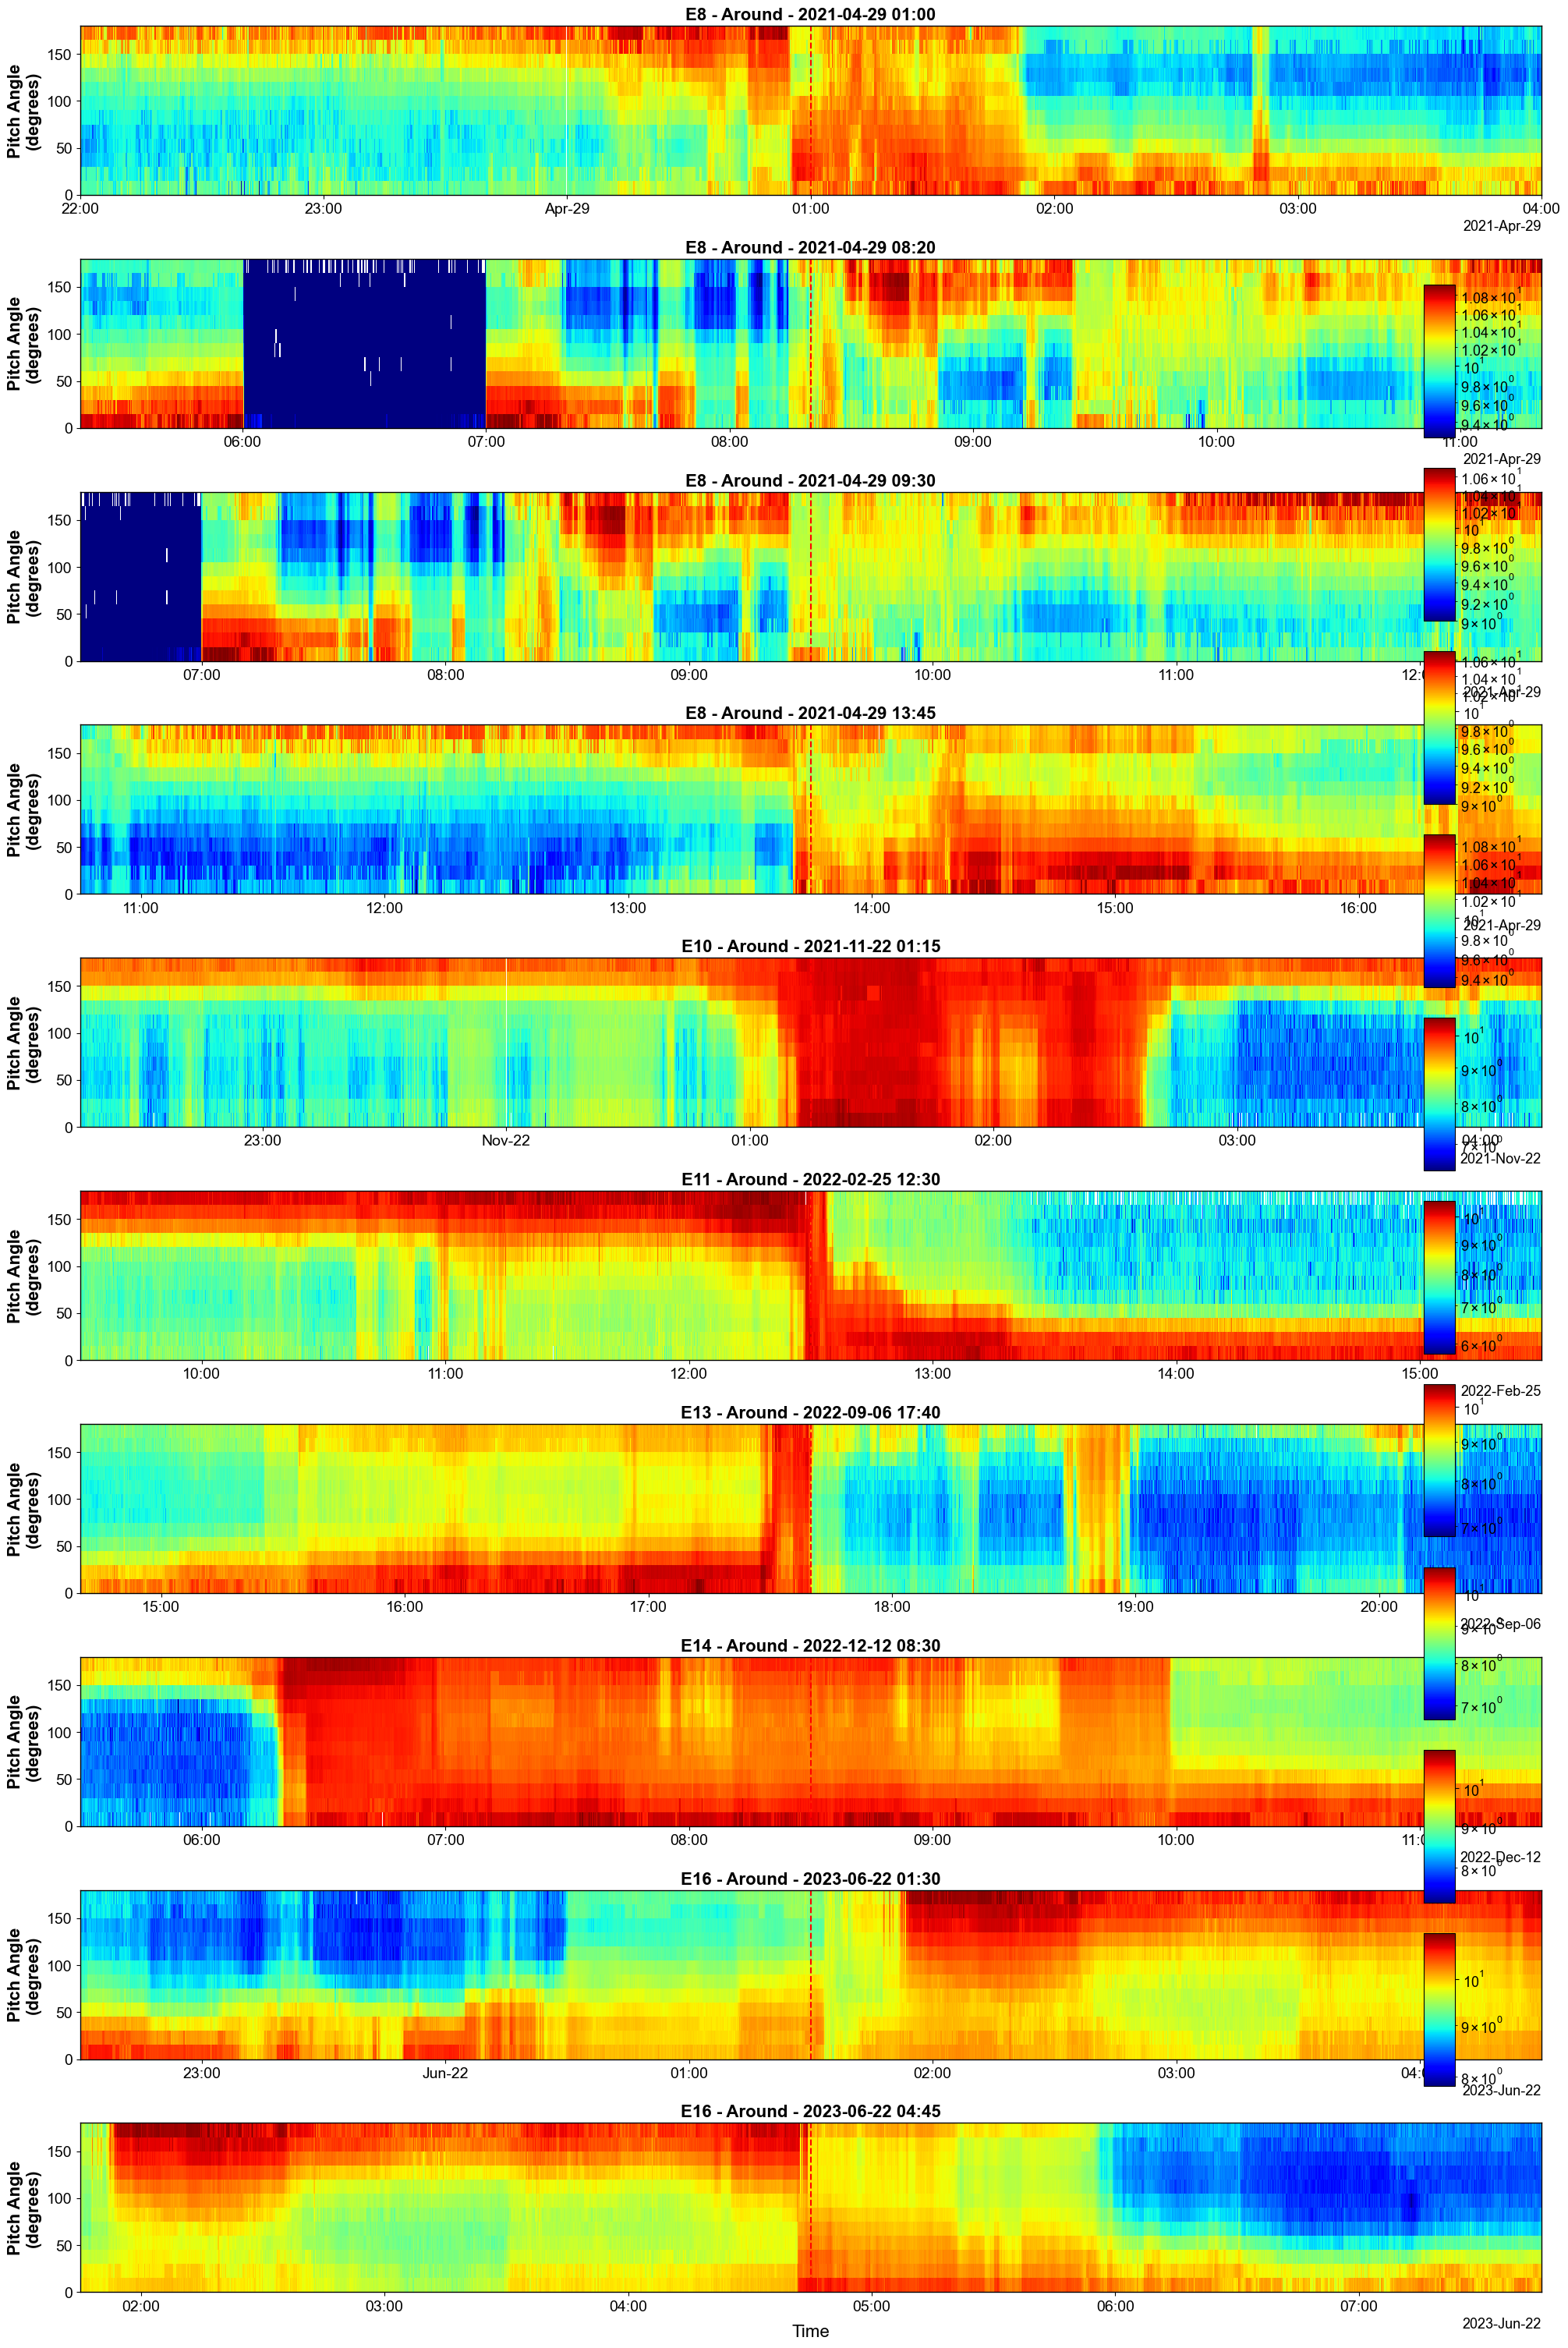

In [19]:
#######-----📈📈📈📈📈 MULTIPLOTTING MAGIC - STRAHL EXAMPLE 📉📉📉📉📉📉-----#######

#====================================================================
# CONFIGURE PRINT MANAGER AND SERVER ACCESS
#====================================================================
# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False  # Debug prints, helpful for debugging

# server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

#====================================================================
# RESET PLOTTING OPTIONS
#====================================================================
plt.options.reset() # Resetting options to ensure a clean slate

#====================================================================
# CONFIGURE GENERAL PLOT OPTIONS
#====================================================================

# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 3
plt.options.hspace = .5

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 12
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 10

plt.options.use_single_title = False
plt.options.single_title_text = "Br Around PSP HCS Crossings"
plt.options.y_label_uses_encounter = False
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = False
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

#====================================================================
# CONFIGURE AXIS-SPECIFIC OPTIONS ✨NEW!✨
#====================================================================
plt.options.ax2.colorbar_limits = (9, 10.7) #We're setting a custom limit to correct for the area where the instrument dropped out.
plt.options.ax3.colorbar_limits = (9, 10.7) #This causes the drop-out region to appear dark blue, but the rest of the data is properly scaled.

#====================================================================
# Ploptions work too!
#====================================================================
epad.strahl.colorbar_limits = 'default' #Setting to default in case this was changed elsewhere... it gets overriden by the axis specific option for ax2 and ax3!

#====================================================================
# DATA SELECTION FOR PLOTTING
#====================================================================
hcs_crossing_times = [ #in the previous example we defined the times outside the cell, either way works!
    '2021-04-29/01:00:00.000',
    '2021-04-29/08:20:00.000',
    '2021-04-29/09:30:00.000',
    '2021-04-29/13:45:00.000',
    '2021-11-22/01:15:00.000',
    '2022-02-25/12:30:00.000',
    '2022-09-06/17:40:00.000',
    '2022-12-12/08:30:00.000',
    '2023-06-22/01:30:00.000',
    '2023-06-22/04:45:00.000'
]

plt.options.window = '06:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

plot_variable = epad.strahl

# Create the plot data list using list comprehension
plot_data = [(time, plot_variable) for time in hcs_crossing_times]

#====================================================================
# CALL MULTIPLOT WITH UPDATED OPTIONS
#====================================================================
multiplot(plot_data); #✨Un-comment to Plot! 

🛰️ spe_sf0_pad - acquiring variables: strahl
📡 spe_sf0_pad - Local .cdf files already exist:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230925_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230926_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230927_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230928_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20230929_v04.cdf
☑️ - CDF Data import complete for spe_sf0_pad range ['2023-09-25/23:28:00.000000', '2023-09-29/23:28:00.000000'].

📥 Updating spe_sf0_pad...
✅ Data acquisition complete

🛰️ spe_sf0_pad - acquiring variables: strahl
📡 spe_sf0_pad - Local .cdf files already exist:
📂 psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20231227_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20231228_v04.cdf, psp_data/sweap/spe/l3/spe_sf0_pad/2023/psp_swp_spe_sf0_L3_pad_20231229_v04.cdf, p

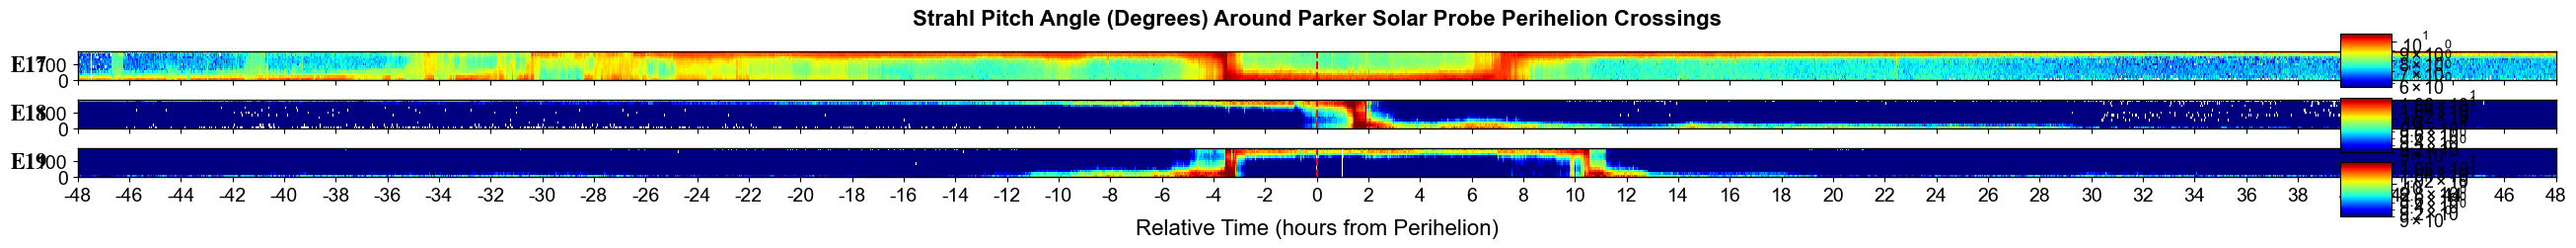

(<Figure size 2600x240 with 6 Axes>,
 [<Axes: title={'center': 'Strahl Pitch Angle (Degrees) Around Parker Solar Probe Perihelion Crossings'}, ylabel='$\\mathbf{E17}$'>,
  <Axes: ylabel='$\\mathbf{E18}$'>,
  <Axes: xlabel='Relative Time (hours from Perihelion)', ylabel='$\\mathbf{E19}$'>])

In [20]:
#Example Strahl Plot

encounters = [

    {'perihelion': '2023/09/27 23:28:00.000'}, #Enc 17
    {'perihelion': '2023/12/29 00:56:00.000'}, #Enc 18
    {'perihelion': '2024/03/30 02:21:00.000'}, #Enc 19 

]

# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False   # Debug prints, helpful for debugging

# server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# plot_variable = proton.m_alfven   
# plot_variable = mag_rtn_4sa.br
# plot_variable = mag_rtn_4sa.bt
plot_variable = epad.strahl

perihelion_times = [(encounter['perihelion'], plot_variable) for encounter in encounters]

# Update plt.options with the multiplot settings
plt.options.window = '96:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

# Plot Sizing
plt.options.width = 26
plt.options.height_per_panel = 0.8
plt.options.hspace = 0.15

# Font Sizes and Padding
plt.options.title_fontsize = 12
plt.options.y_label_size = 14
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10  # Size of x-axis tick labels
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5  # Space between y-label and axis

plt.options.use_single_title = True
# plt.options.single_title_text = "Alfven Mach Number Around Perihelion for Multiple Encounters"
# plt.options.single_title_text = "PSP FIELDS Br (nT) Around Perihelion for Multiple Encounters"
plt.options.single_title_text = "Strahl Pitch Angle (Degrees) Around Parker Solar Probe Perihelion Crossings"

plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = True
plt.options.relative_time_step_units = 'hours'  # use 'days', 'hours', 'minutes', or 'seconds'.
plt.options.relative_time_step = 2
plt.options.use_single_x_axis = True
plt.options.use_custom_x_axis_label = True
plt.options.custom_x_axis_label = "Relative Time (hours from Perihelion)"

# Call multiplot with updated options
multiplot(perihelion_times) #✨Un-comment to Plot!


🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - Local .cdf files already exist:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210428_v02.cdf, psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-04-28/22:00:00.000000', '2021-04-29/04:00:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2021-04-29/05:20:00.000000', '2021-04-29/11:20:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2021/psp_fld_l2_mag_rtn_4_sa_per_cyc_20210429_v02.cdf
☑️ - CDF D

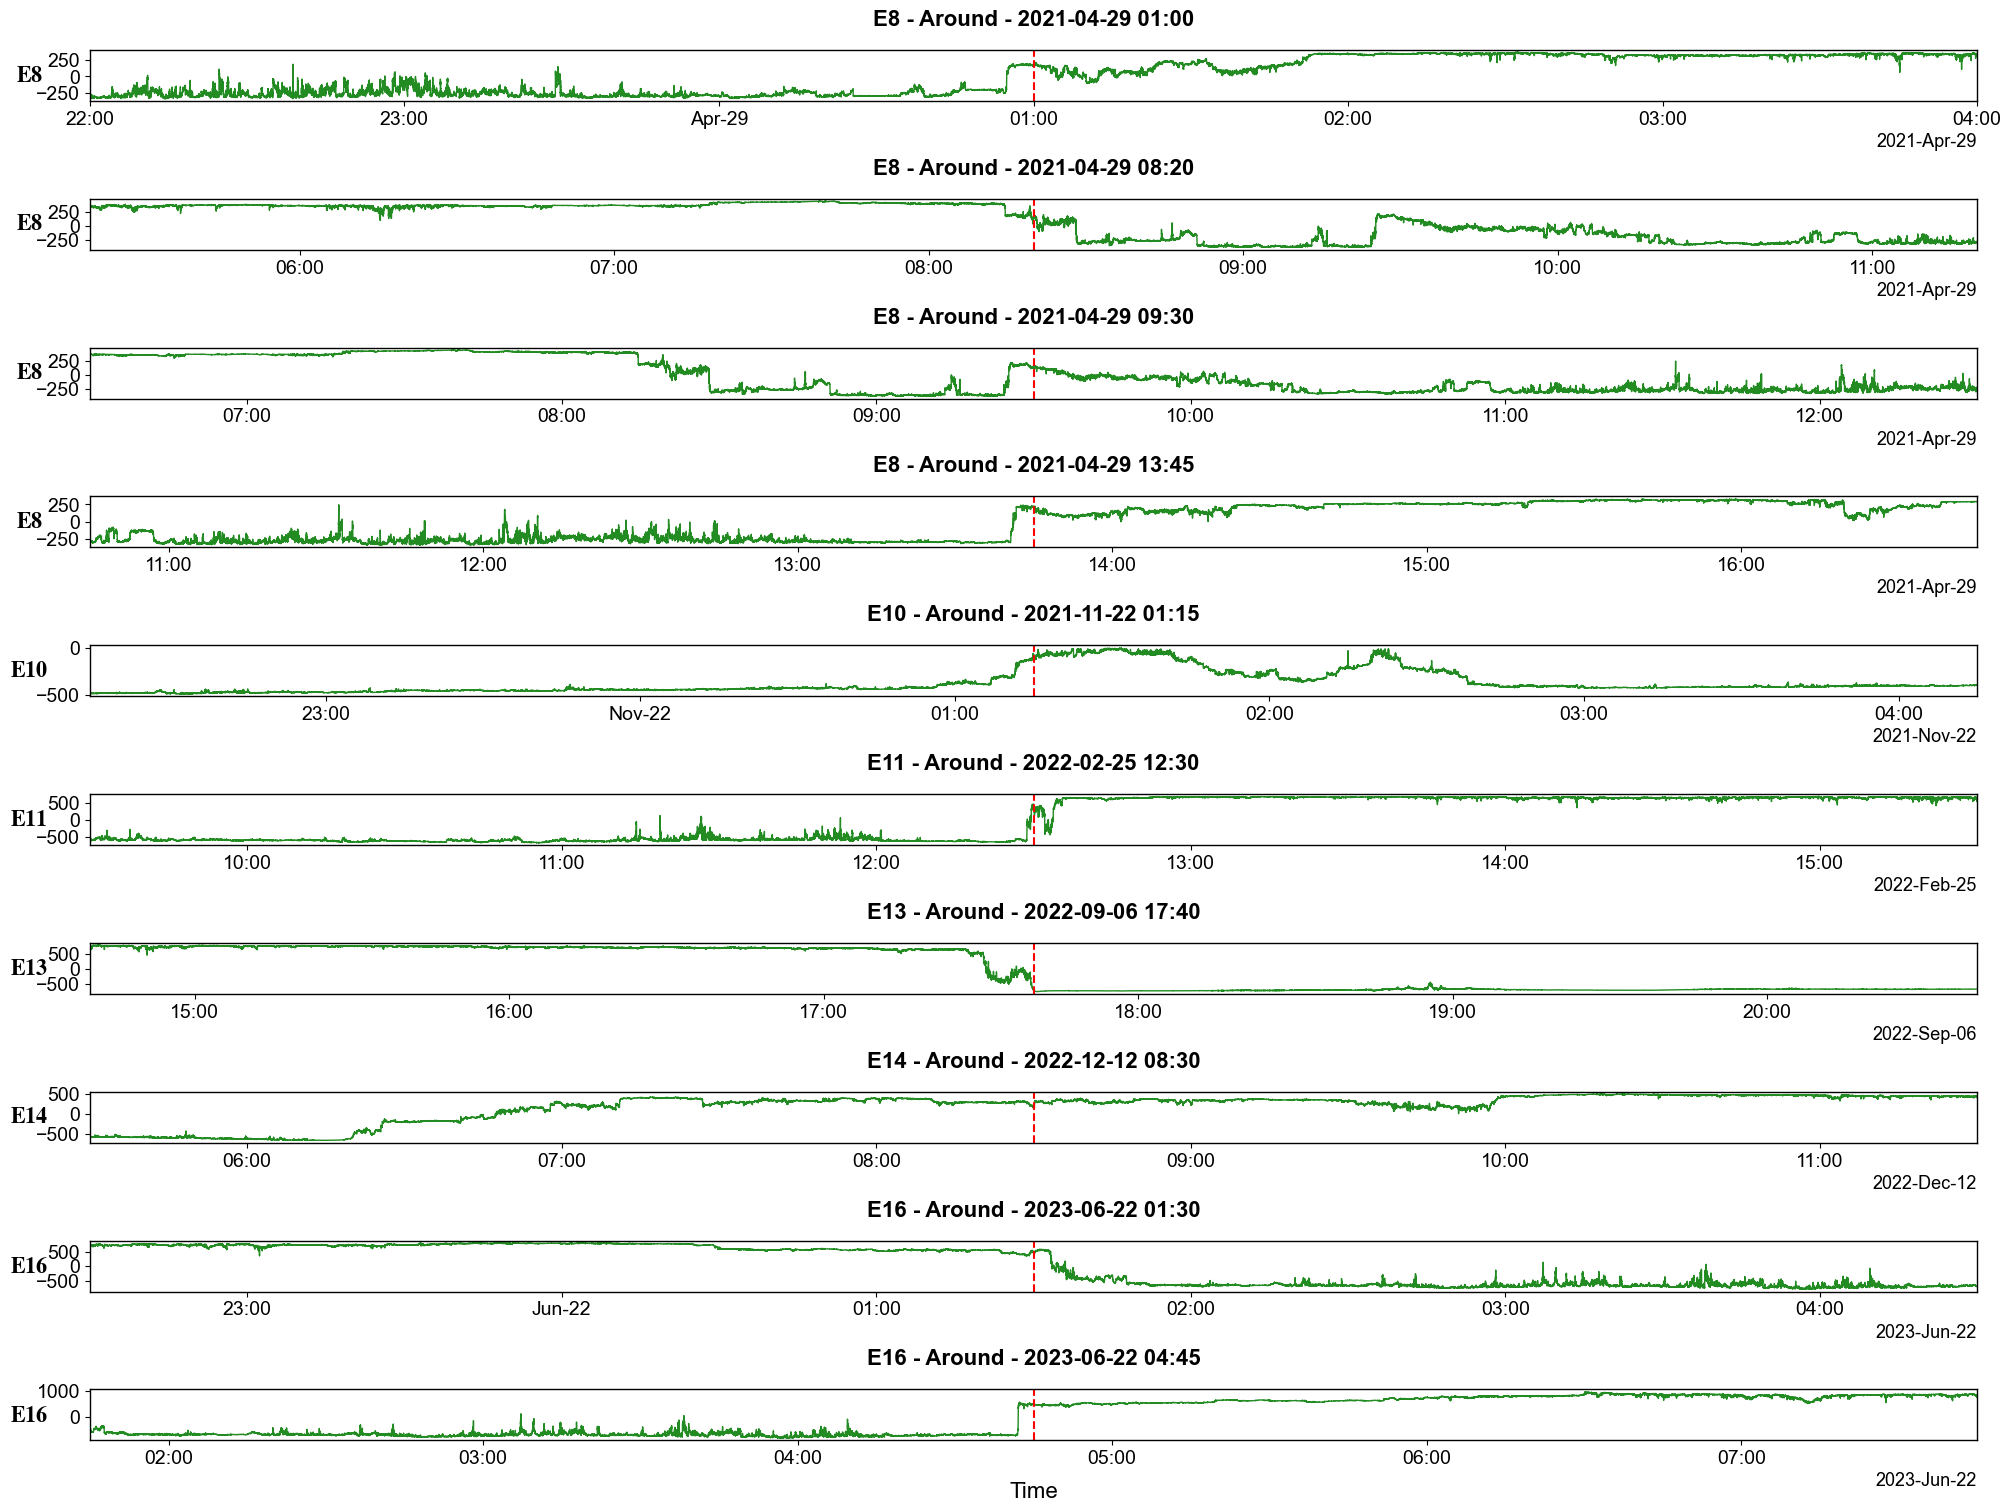

In [21]:
# And we can still create our plots this way! 🙌

# print_manager.show_status = True  # Status prints, useful for status updates
# print_manager.show_debug = False   # Debug prints, helpful for debugging

# server_access.username = None # Set to None for username prompt, or enter 'your_username' to hardcode.

# Update plt.options with the multiplot settings
plt.options.window = '06:00:00.000'
plt.options.position = 'around'  # Position options for multiplot: 'before', 'after', 'around'

# Plot Sizing
plt.options.width = 20
plt.options.height_per_panel = 1.5
plt.options.hspace = 0.8

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 14
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 5
plt.options.x_label_pad = 10

plt.options.use_single_title = False
plt.options.single_title_text = "Br Around PSP HCS Crossings"
plt.options.y_label_uses_encounter = True
plt.options.y_label_includes_time = False

plt.options.draw_vertical_line = True
plt.options.vertical_line_width = 1.5
plt.options.vertical_line_color = 'red'
plt.options.vertical_line_style = '--'

plt.options.use_relative_time = False
plt.options.relative_time_step_units = 'hours'
plt.options.relative_time_step = 6
plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None

# Call multiplot with updated options
multiplot([
    ('2021-04-29/01:00:00.000', mag_rtn_4sa.br),
    ('2021-04-29/08:20:00.000', mag_rtn_4sa.br),
    ('2021-04-29/09:30:00.000', mag_rtn_4sa.br),
    ('2021-04-29/13:45:00.000', mag_rtn_4sa.br),
    ('2021-11-22/01:15:00.000', mag_rtn_4sa.br),
    ('2022-02-25/12:30:00.000', mag_rtn_4sa.br),
    ('2022-09-06/17:40:00.000', mag_rtn_4sa.br),
    ('2022-12-12/08:30:00.000', mag_rtn_4sa.br),
    ('2023-06-22/01:30:00.000', mag_rtn_4sa.br),
    ('2023-06-22/04:45:00.000', mag_rtn_4sa.br)
]);

--- Generating Combined Multiplot ---
🛰️ ham - acquiring variables: hamogram_30s
Successfully loaded Hammerhead data with 6180 time points
📥 Updating ham with CSV data...
✅ Data acquisition complete

🛰️ ham - acquiring variables: Tperprat_driftva_hc
📤 Using existing ham data, update not needed.
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: bmag
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20250322_v00.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2025-03-22/11:30:00.000000', '2025-03-22/14:30:00.000000'].

📥 Updating mag_RTN_4sa...
✅ Data acquisition complete

🛰️ mag_RTN_4sa - acquiring variables: br
📡 mag_RTN_4sa - A local .cdf file already exists:
📂 psp_data/fields/l2/mag_rtn_4_per_cycle/2025/psp_fld_l2_mag_RTN_4_Sa_per_Cyc_20250322_v00.cdf
☑️ - CDF Data import complete for mag_RTN_4sa range ['2025-03-22/11:30:00.000000', '2025-03-22/14:30:00.000000'].

📥 Updating mag_R

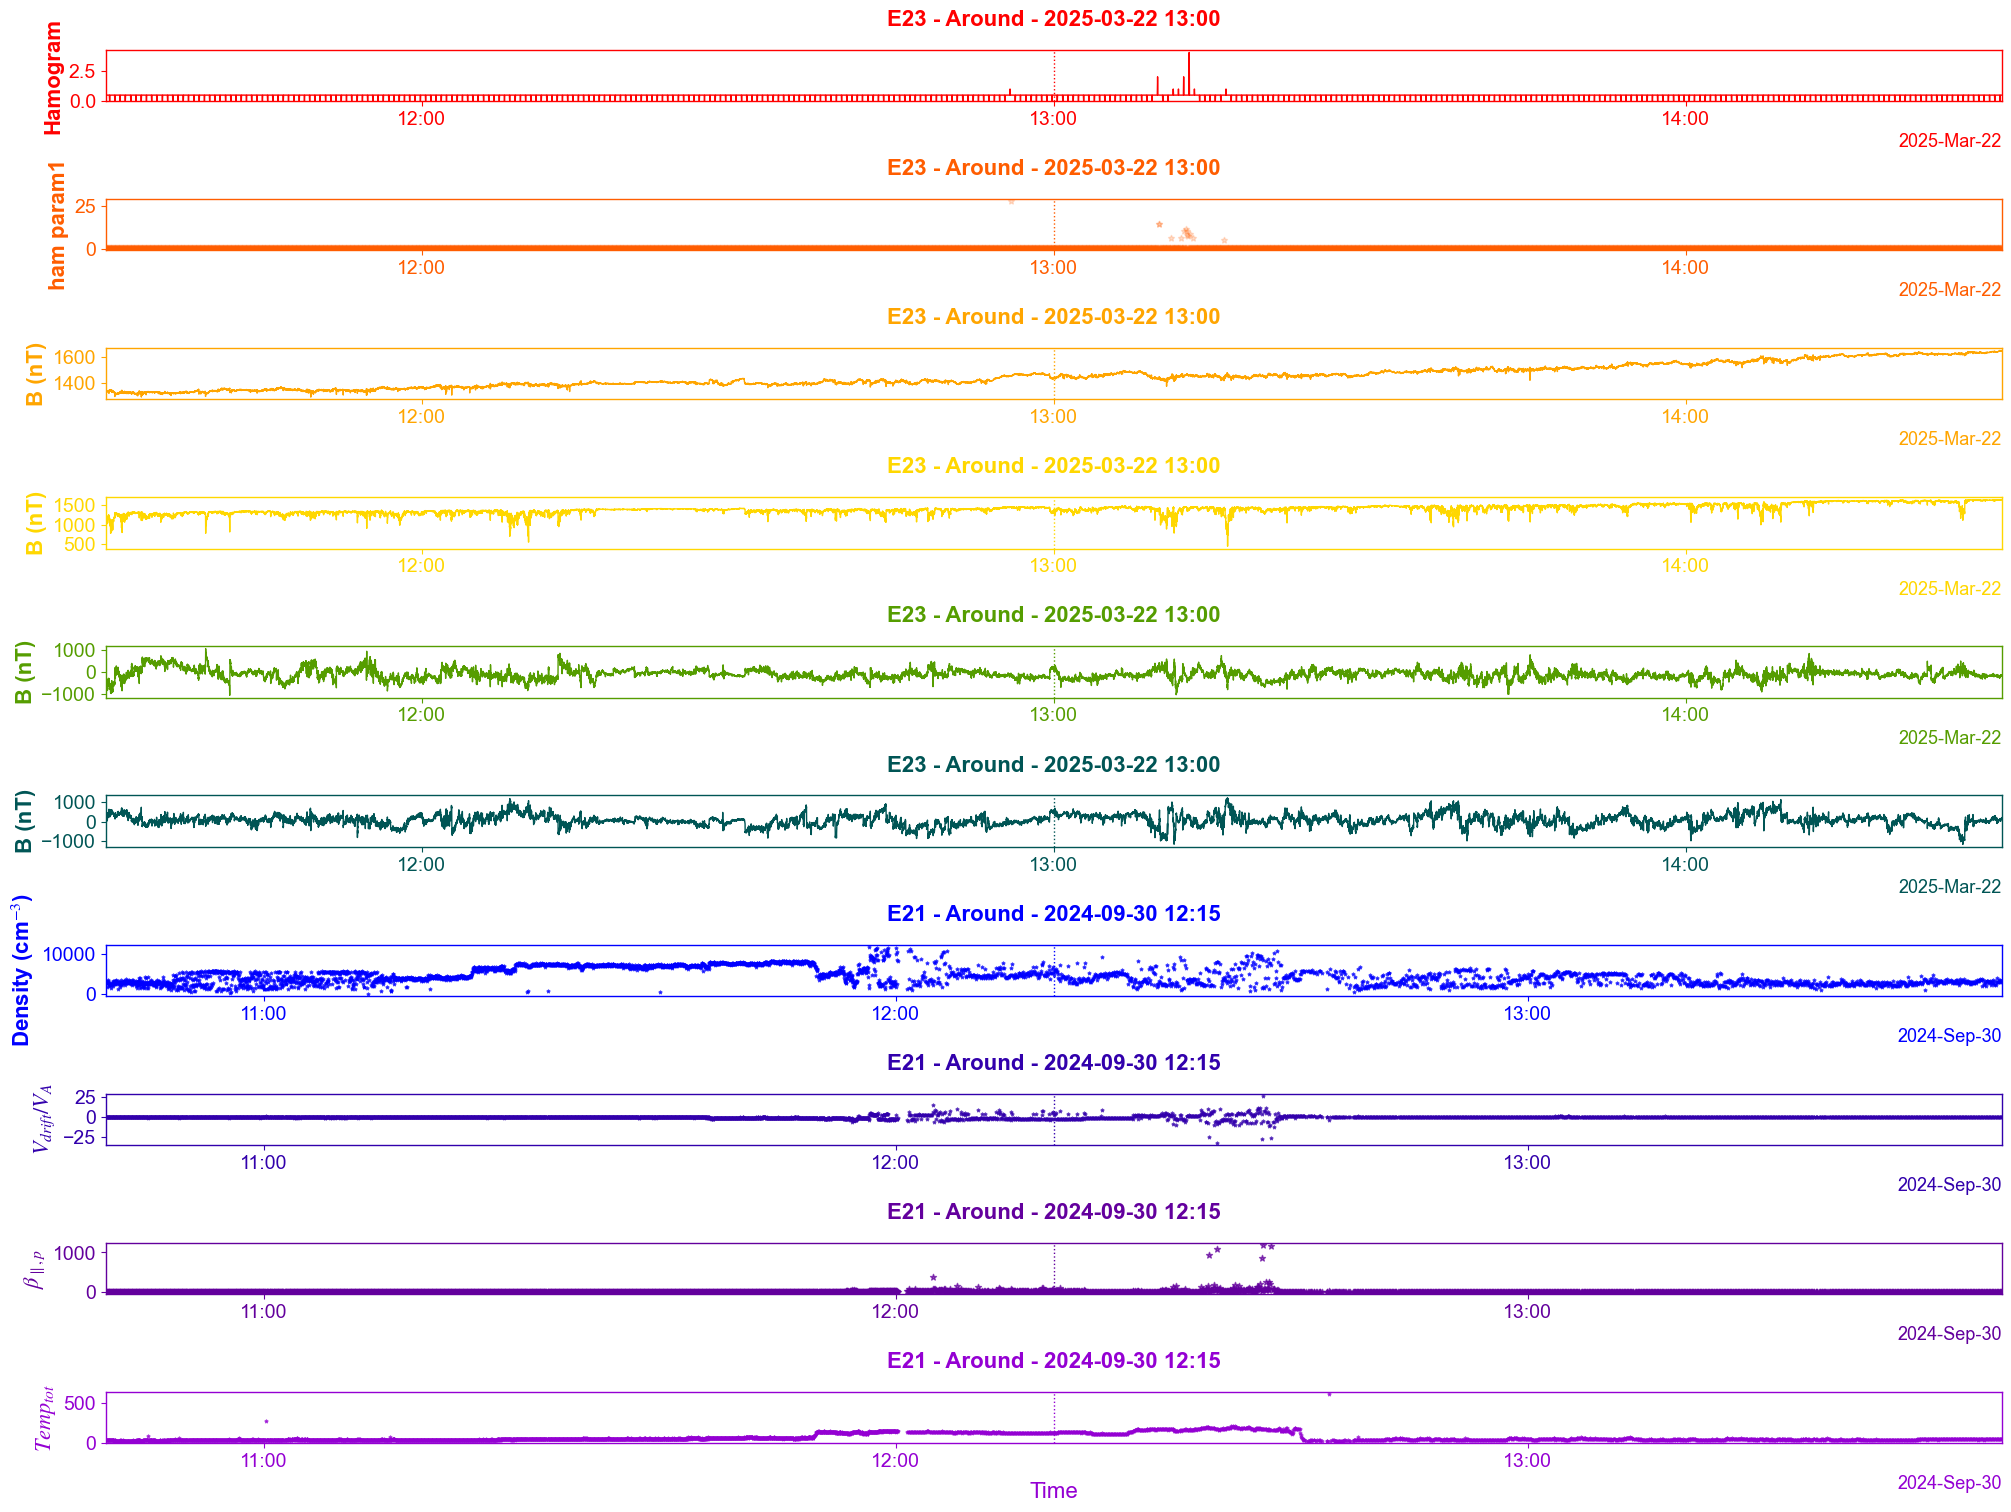


--- Combined multiplot example generated ---


In [22]:
# Mixing it up and getting a lil' wild!

print("--- Generating Combined Multiplot ---")

print_manager.show_status = True  # Status prints, ⭐️ useful for basic status updates

#Use inline for static plots and widget for interactive plots
%matplotlib inline 
# %matplotlib widget

ham_plot_time = '2025-03-22 13:00:00'  # Updated to use HAM date we know exists

# Define time for FITS data - use direct center time instead of calculation
fits_center_time_str = '2024-09-30 12:15:00'  # Simple midpoint of FITS test range

# --- Variables and Combined Plot Data ---
# List of variables for the Hammerhead section
plot1_vars = [
    ham.hamogram_30s,
    ham.Tperprat_driftva_hc,
    mag_rtn_4sa.bmag,
    mag_rtn_4sa.br,
    mag_rtn_4sa.bt,
    mag_rtn_4sa.bn
]

# List of FITS variables for the FITS section
plot2_vars = [
    proton_fits.np1,
    proton_fits.vdrift_va_pfits,
    proton_fits.beta_ppar_pfits,
    proton_fits.Temp_tot
]

# Create the combined plot data list:
# Associate HAM/Context vars with ham_plot_time
# Associate FITS vars with fits_center_time_str
plot_data_combined = (
    [(ham_plot_time, var) for var in plot1_vars] +
    [(fits_center_time_str, var) for var in plot2_vars]
)

# --- Configure Plot Options for Combined Plot ---
plt.options.reset() # Start fresh
plt.options.width = 16
# Adjust height per panel if needed for a taller plot
total_panels = len(plot_data_combined)
plt.options.height_per_panel = 1.2 # Slightly smaller height per panel for many panels
plt.options.use_single_title = False
plt.options.single_title_text = f"Combined Plot: HAMS ({ham_plot_time}) & FITS ({fits_center_time_str})"
# Window and position will be determined by the time point for each panel individually
plt.options.window = '3:00:00.000' # Default window, will apply to each panel's center time
plt.options.position = 'around'
plt.options.draw_vertical_line = True # Draw vertical line at the center time for each panel

# Disable rainbow for clarity on combined plot
plt.options.color_mode = 'rainbow'  # Options: 'default', 'rainbow', 'single'
plt.options.single_color = None     # Used when color_mode = 'single'

plt.options.width = 20
plt.options.height_per_panel = 1.5
plt.options.hspace = 0.8

# Font Sizes and Padding
plt.options.title_fontsize = 11
plt.options.y_label_size = 12
plt.options.x_label_size = 12
plt.options.x_tick_label_size = 10
plt.options.y_tick_label_size = 10
plt.options.y_label_pad = 4

# plt.options.use_single_title = False
# plt.options.single_title_text = "Br Around PSP HCS Crossings"
plt.options.y_label_uses_encounter = False
plt.options.y_label_includes_time = False

# plt.options.draw_vertical_line = True
# plt.options.vertical_line_width = 1.5
# plt.options.vertical_line_color = 'red'
# plt.options.vertical_line_style = '--'

plt.options.use_relative_time = False
plt.options.use_single_x_axis = False
plt.options.use_custom_x_axis_label = False
plt.options.custom_x_axis_label = None


# Generate the combined multiplot
# Multiplot will fetch data for EACH (time, variable) pair based on the specified time
multiplot(plot_data_combined);
# plt.show() # Keep plots displayed in notebook

print("\n--- Combined multiplot example generated ---")
